
# Heart disease detection

# 1 Introduction

**Background**

Heart disease could be fatal and it would be important to identify early and take some precautionary measures. But it would not be an easy task to diagnoise such disease at an early stage. By leveraging machine learning techniques, it could become possible to identify with high accuracy, through analyzing some personal information such as sleep hours, past disease history, age, etc.


**Dataset Overview**

The dataset we used from Kaggle, 'Personal Key Indicators of Heart Disease', (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data) is a comprehensive collection of data aimed at identifying the relationships between various metrics and the presence of heart disease in individuals.

The dataset includes a variety of features categorized into demographic, lifestyle, and medical metrics:

* Demographic Information: Age, Sex, Race, and other personal attributes that may influence health outcomes.

* Lifestyle Choices: Data on smoking, alcohol intake, physical activity, diet, and sleep patterns.

* Health Metrics: Body Mass Index (BMI), past disease history.

* Heart Disease Status: A binary indicator showing whether an individual has been diagnosed with heart disease, serving as the **target variable** for this project.

**Methodology**
* Explore the Dataset: Check if there are missing values in the dataset, and examine the data distribution for each features and target variable.

* Pre-process Data: Normalize each variable to make them comparable in magnitude, and then select more influential features (dimension reduction) via two approaches: by correlation matrix (PCA), and by Principal Component Analysis (PCA).

* Develop Predictive Models: Use machine learning techniques (basic models: logistic regression, decision tree, support vector machine, perceptron; advanced models: random forest, gradient boosting) to predict whether heart disease presents.

* Address Class Imbalance: From previous section, it turns out that the data are imbalanced (target variable, in particular). We found that some models such as support vector machine could blindly predict no heart attack and result in >90% accuracy. To address this issue, we apply techniques such as resampling and adjusting class weights to manage the imbalanced nature of the dataset, ensuring robust model performance.

* Evaluate and Compare Models: Assess the performance of each model through various metrics, including accuracy, precision, recall, ROC curves, and confusion matrices.

* Conclusion and recommendations

**As a side note**: some of the codes take quite a while to run, so we have copy-and-pasted some output (generated by our code) in the text below the corresponding code block.

# 2 Preliminary

##2.1 Import relevant libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Utilities
from tabulate import tabulate
from sklearn.datasets import make_classification

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##2.2 Read dataset

Steps to read dataset in your computer:
1. Click the link to access dataset folder: https://drive.google.com/drive/folders/1iDdH1dT5gkFRiGUltrBt-FfG9z8tWzRi

2. Right click on the folder name in Google Drive, and click
'Organize' - 'Add shortcut' - add to 'My Drive'.

3. Run the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/CS3244 group project/heart_2022_with_nans.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# 3 Exploratory Data Analysis

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Gain some general knowledge of the dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

The dataset contains 40 variables, a total of which 39 are features and 1 is the target variable "HadHeartAttack".



In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


By looking at the first few rows of the dataset, we can discover that the data contains numerical and non-numerical variables, and there are also entries with missing values.

Check how many entries with missing values for each variable:

In [ ]:
missing_values=df.isnull()
missing_counts=missing_values.sum()

print('missing counts:')
print(missing_counts)

print()

num_rows_with_missing_val=df.isnull().any(axis=1).sum()
print("Total number of rows with at least one missing value:", num_rows_with_missing_val)


missing counts:
State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
Race

Considering the size of the dataset (>440K), we decide to drop the data (rows) with missing values:

In [ ]:
df_clean=df.dropna()

After dropping those rows, the following shows that there are >240K data remaining:

In [ ]:
num_rows=df_clean.shape[0]
print('number of data remaining:',num_rows)

number of data remaining: 246022


Next, we check the distribution of variables. Let's first consider numerical variables:

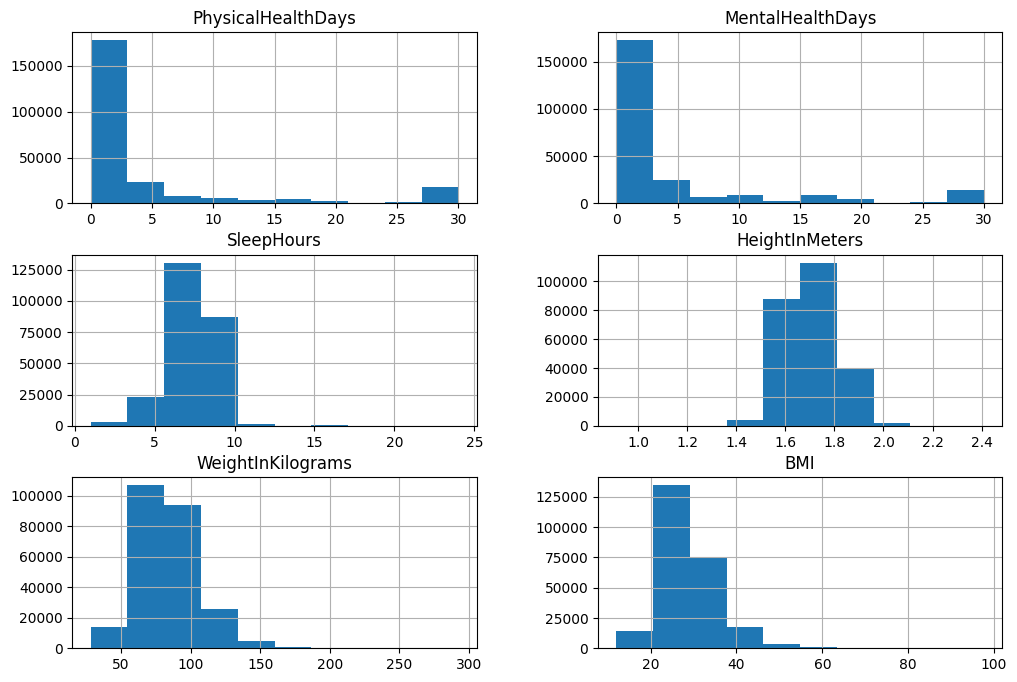

In [ ]:
df_clean[df_clean.describe().columns].hist(figsize=(12,8));

The histograms show that none of the numerical features is normally distributed.

Now we will look at the non-numerical features.

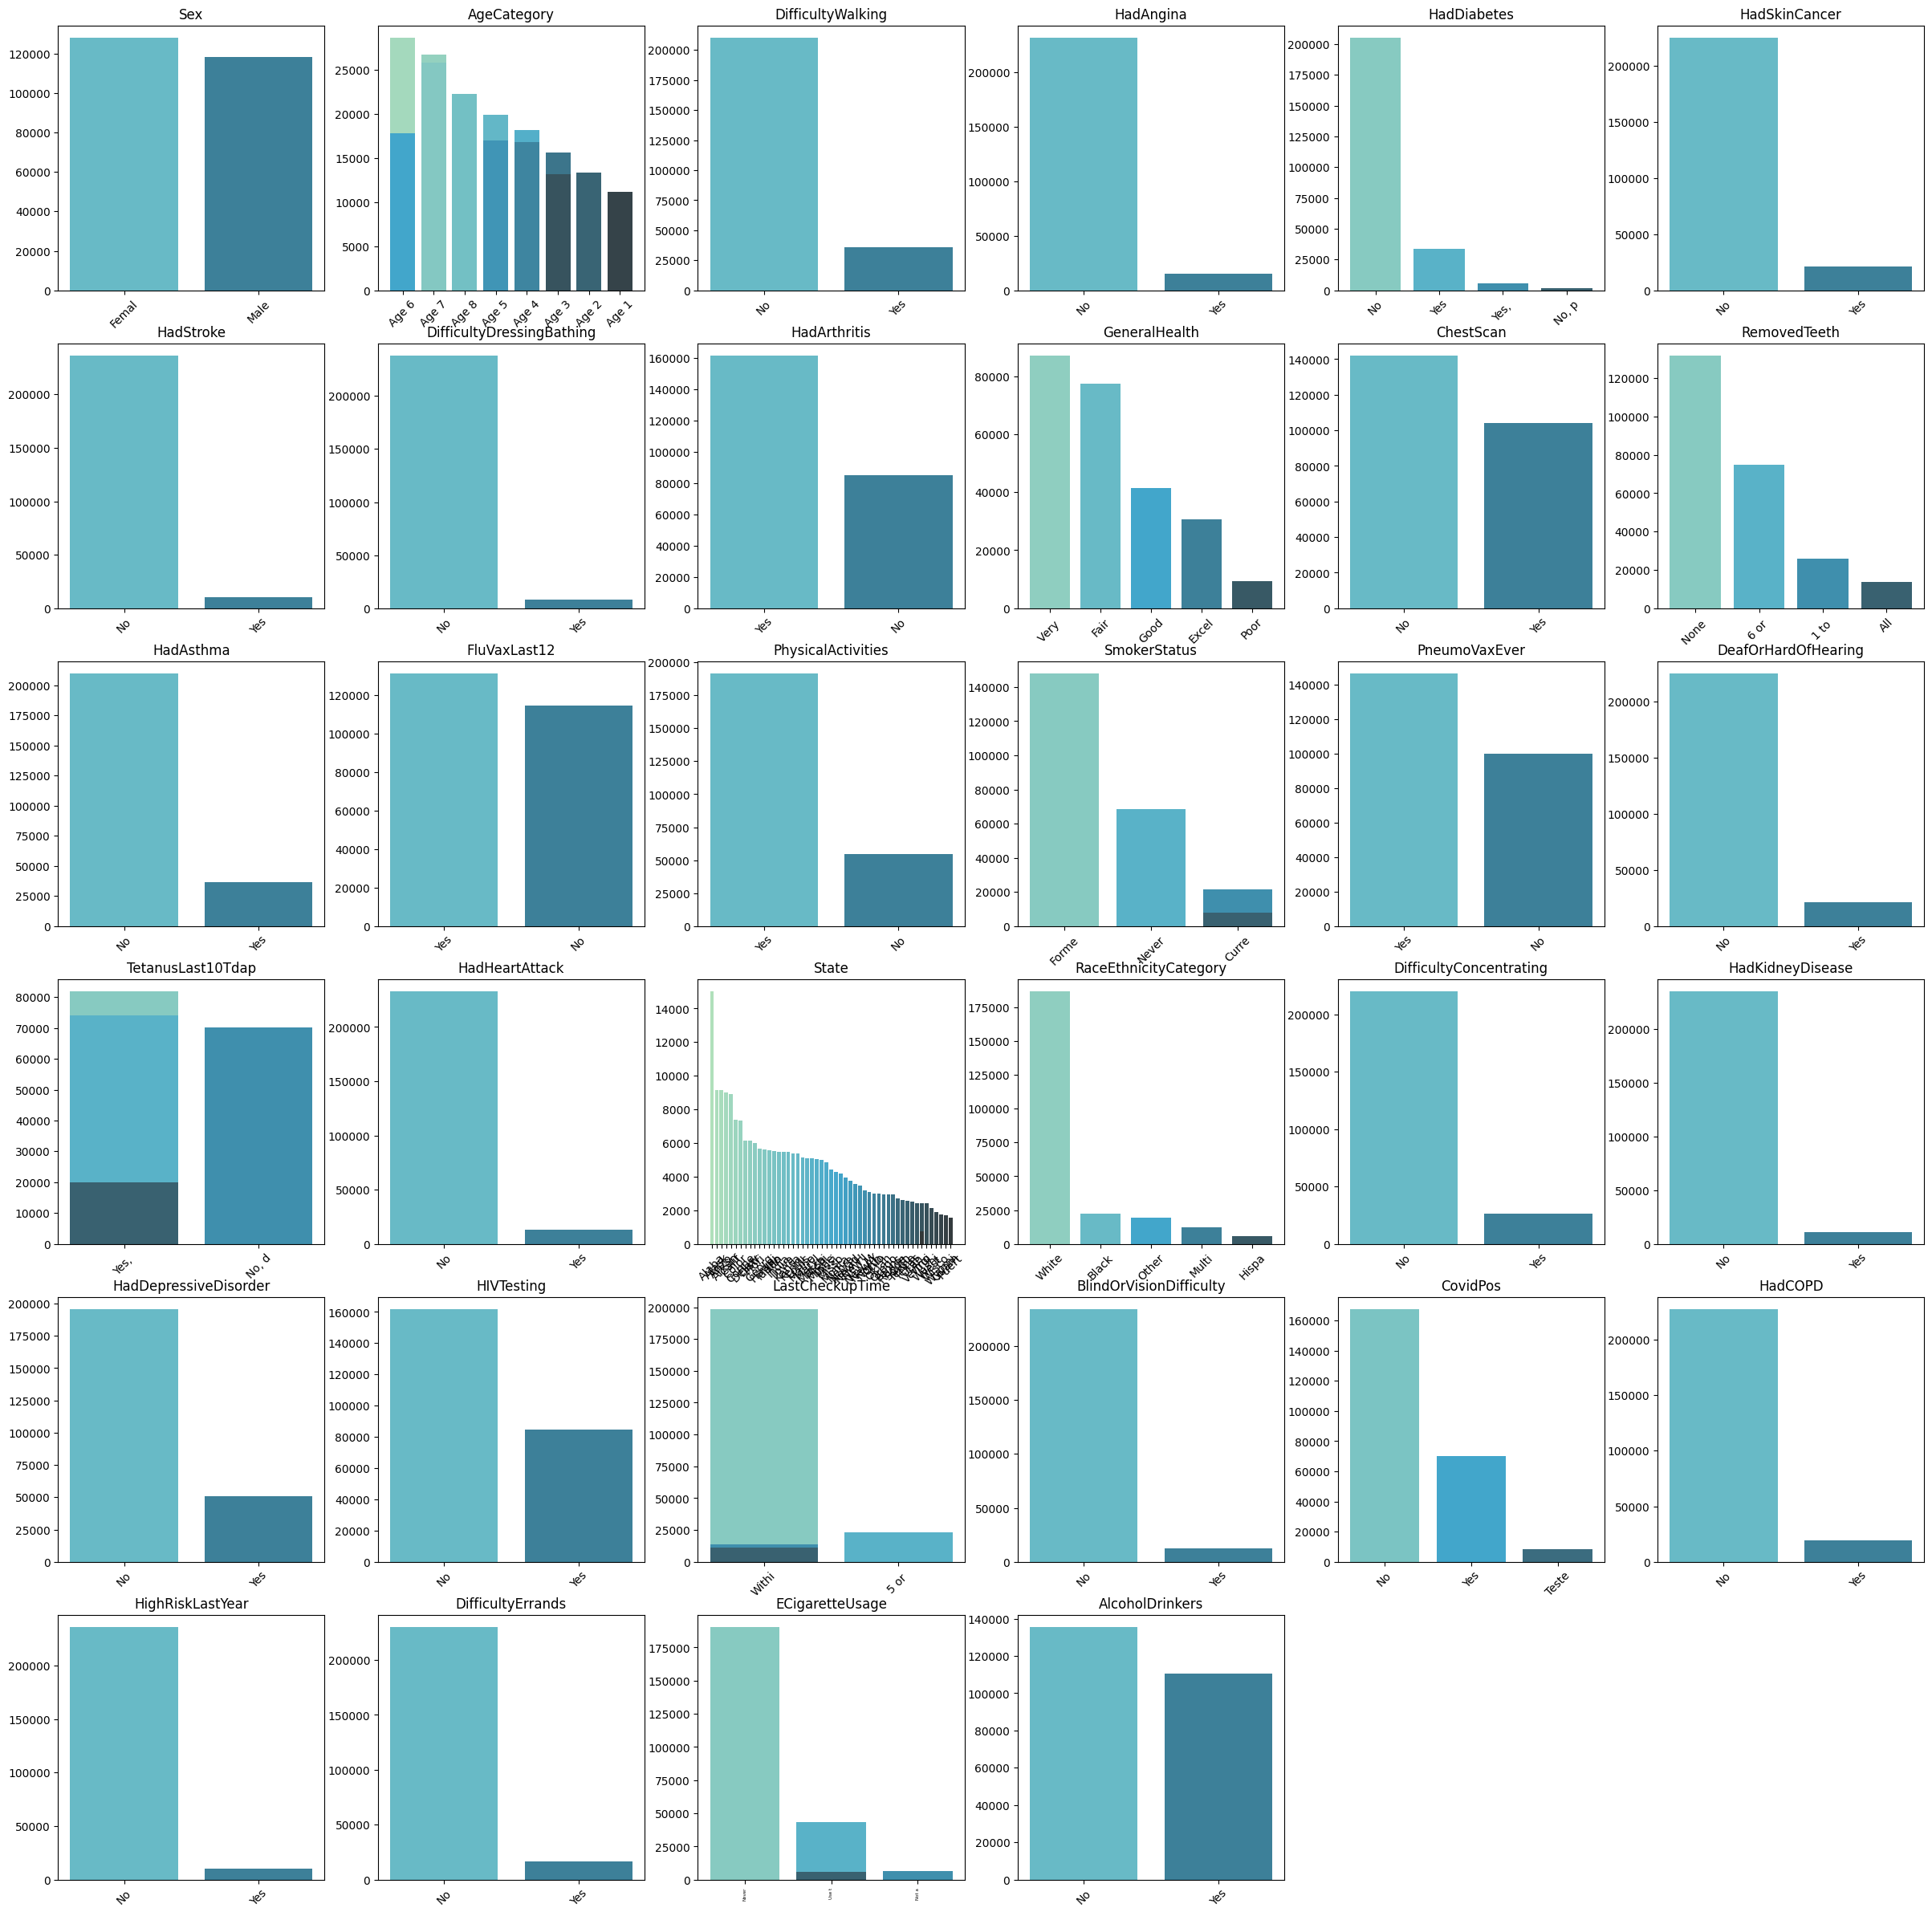

In [ ]:
non_num_cols = list(set(df_clean.columns) - set(df_clean.describe().columns))

fig, axs = plt.subplots(6, 6,figsize=(30,30))
for i, col in enumerate(non_num_cols):
    j=i//6
    k=i%6
    color = sns.color_palette("GnBu_d",n_colors=len(df_clean[col].unique()))
    unique_values = df_clean[col].astype('str').unique()
    labels = [value[:5] for value in unique_values]
    axs[j,k].bar(labels, df_clean[col].value_counts(), color=color)
    axs[j,k].set_title(col)
    axs[j,k].tick_params(axis='x', rotation=45)
axs[5,2].tick_params(axis='x', rotation=90,labelsize=4)
axs[5,4].set_visible(False)
axs[5,5].set_visible(False)
plt.show();

Most of the non-numerical variables, in particular the target variable "HadHeartAttack" (row 1, col 6), are imbalanced. This imbalanced distribution of our target variable could heavily skew our model's ability to accurately predict actual cases of heart attacks, in which we will discuss in the following sections and try to address this problem.

# 4 Data Pre-processing

In [ ]:
# Preprocessing and model evaluation tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA

First, we transform categorical variables into integer type and normalize each variable.

In [ ]:
cat_df = df_clean.select_dtypes(include=['object'])
encoder = LabelEncoder()

for i in cat_df:
    df_clean[i] = encoder.fit_transform(df_clean[i])

#check:
df_clean['HadDiabetes'].value_counts()

HadDiabetes
0    204834
2     33813
1      5392
3      1983
Name: count, dtype: int64

In [ ]:
scaled = MinMaxScaler()
normalized_data = scaled.fit_transform(df_clean)

df_normalized = pd.DataFrame(normalized_data, columns=df_clean.columns)

#check:
df_normalized['HadDiabetes'].value_counts()

HadDiabetes
0.000000    204834
0.666667     33813
0.333333      5392
1.000000      1983
Name: count, dtype: int64

As the dataset involves 40 variables and not all variable can affect the target incidence (for example, the variable "BlindOrVisionDifficulty" should not affect heart disease by common sense), it is necessary to check for linear separability and reduce dimensions when necessary. Also, dropping some variables reduces the chance of overfitting, significantly decrease the computational resources required, and improve model performance.

We use two methods for dimensionality reduction: check by correlation matrix (Corr) and Principal Component Analysis (PCA).

## 4.1 Correlation Matrix

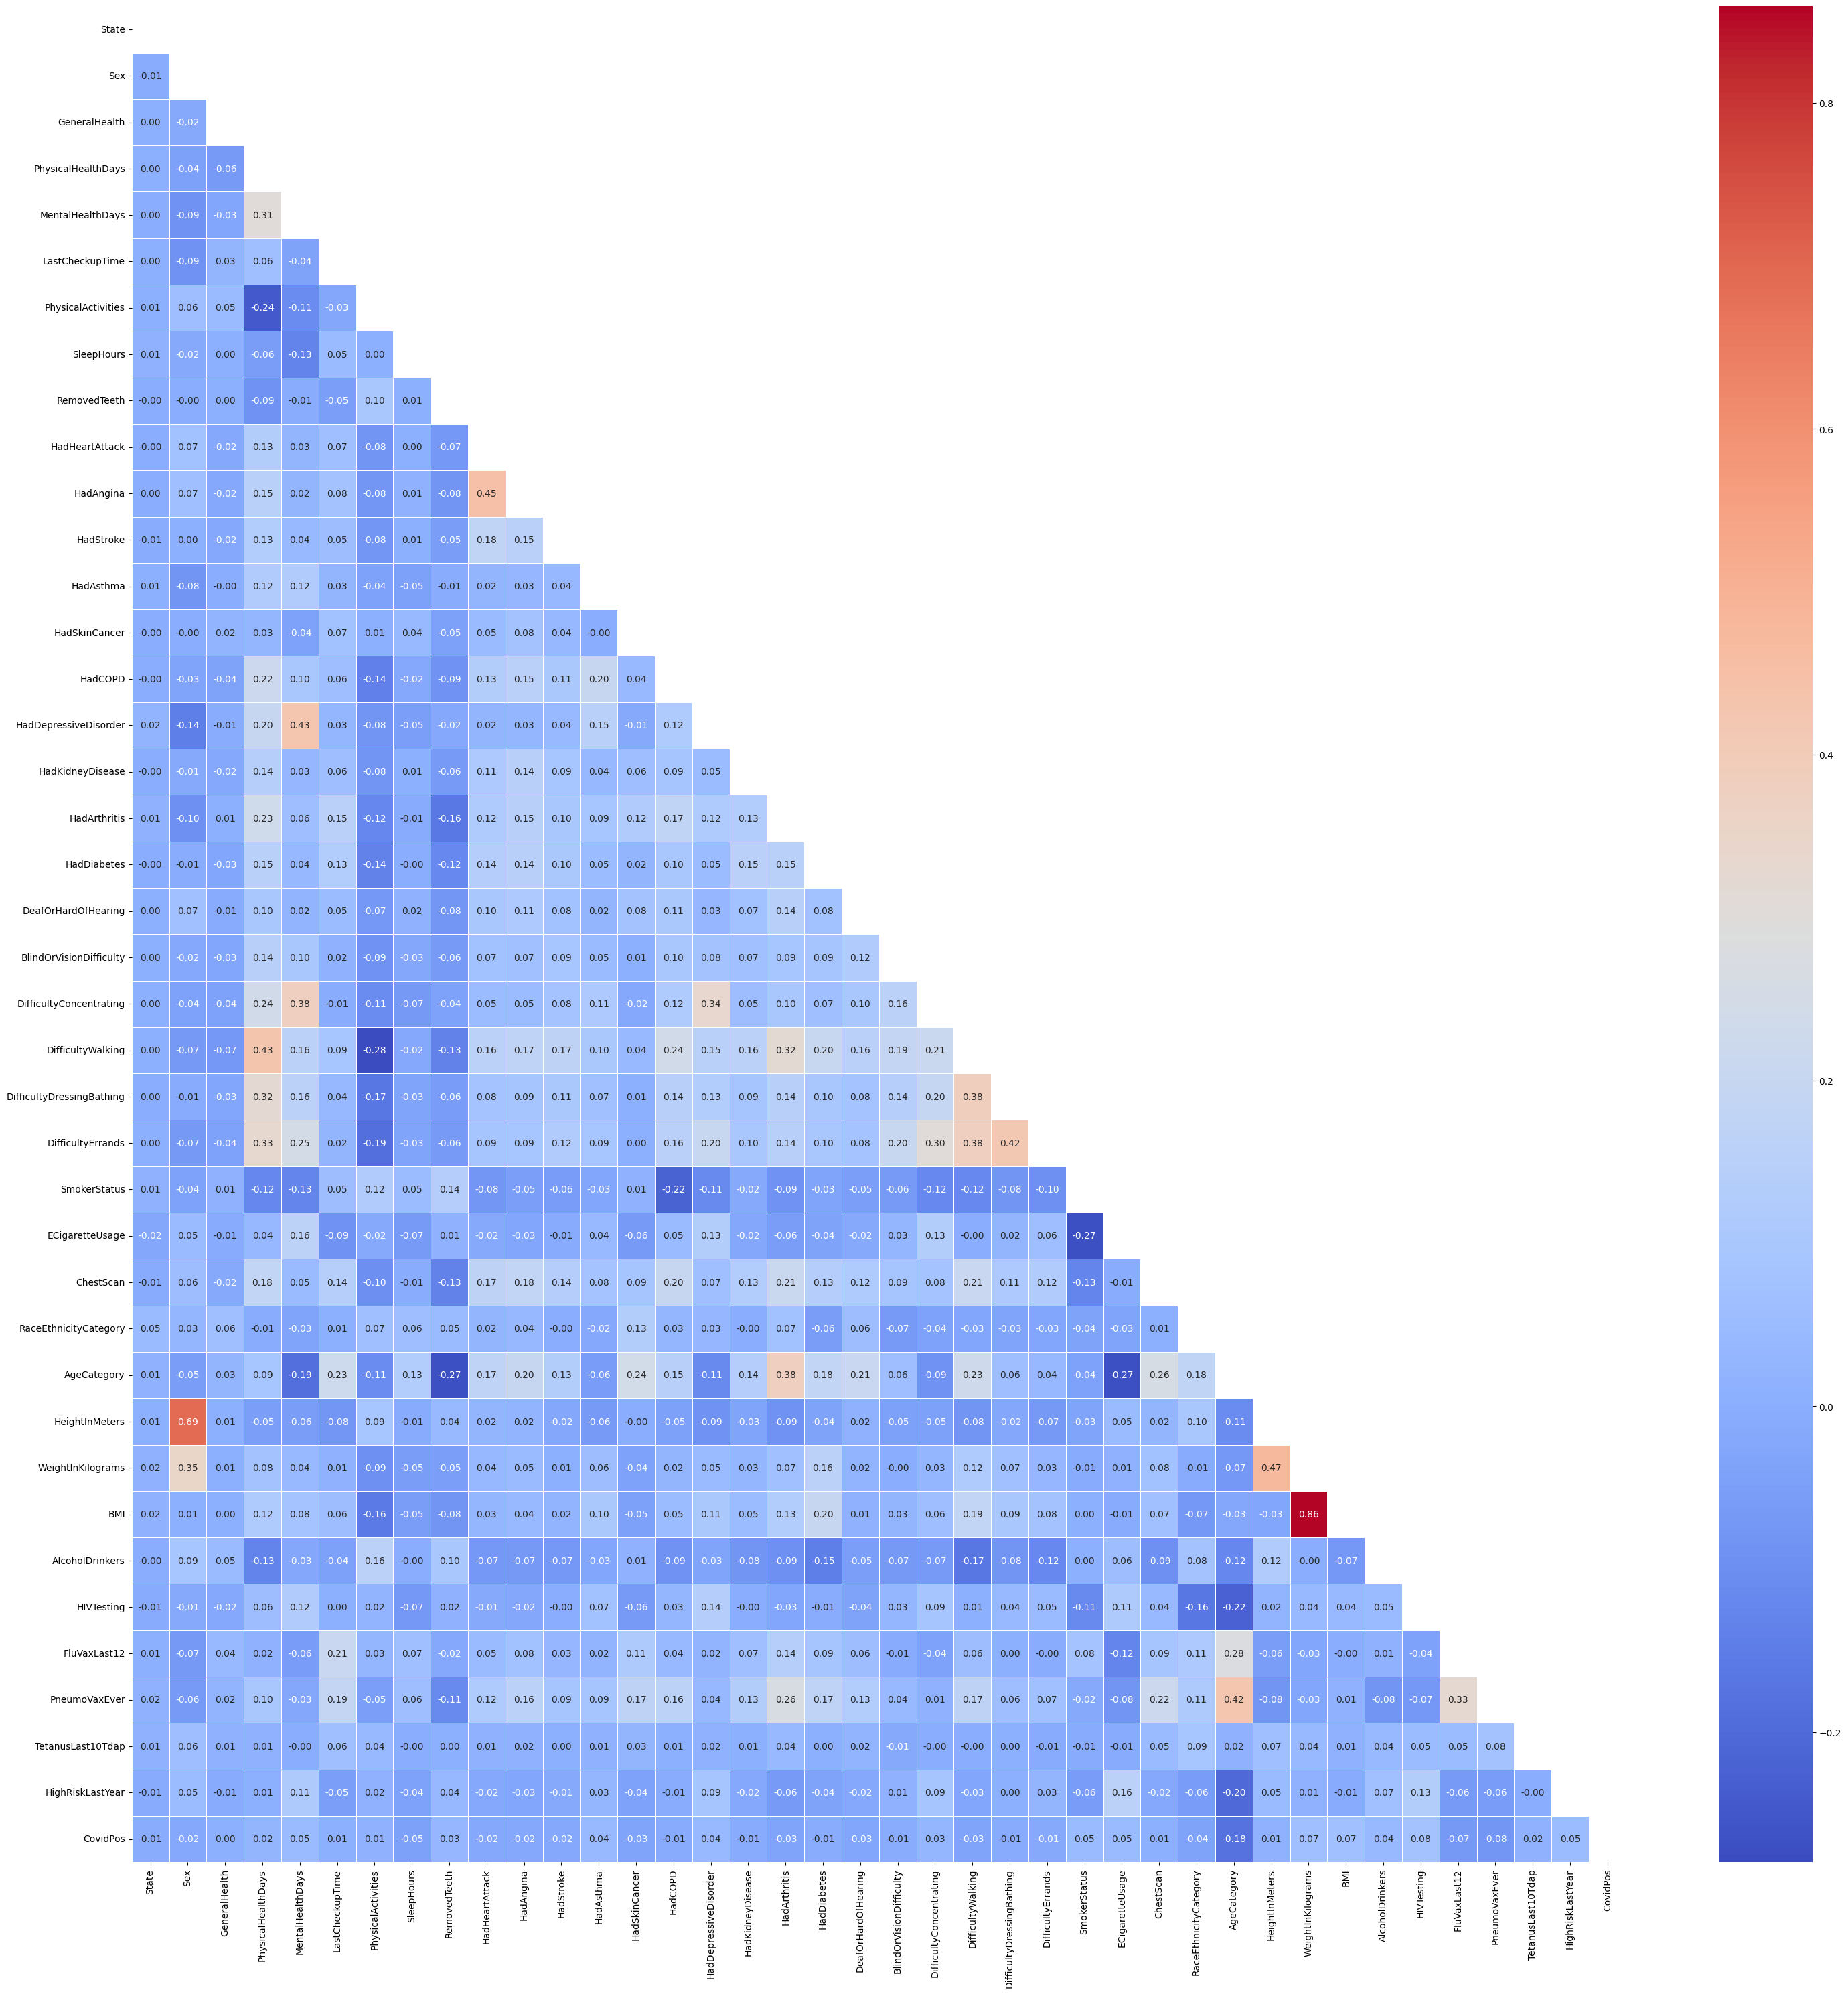

In [ ]:
corr_matrix = df_normalized.corr()
plt.figure(figsize = (36,36))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

By examining the correlation matrix, it seems that most variables do not have high correlation between each other, with low absolulte value of their correlation coefficients. To reduce model complexity, we decide to drop features that have a correlation coefficent (with the target variable) of magnitude smaller than or equal to median (of all these correlation coefficients).

In [ ]:
corr_thres=np.median(abs(corr_matrix['HadHeartAttack']))

In [ ]:
df_filtered=df_normalized[corr_matrix.index[abs(corr_matrix['HadHeartAttack'])>corr_thres].tolist()]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  float64
 1   PhysicalHealthDays         246022 non-null  float64
 2   PhysicalActivities         246022 non-null  float64
 3   RemovedTeeth               246022 non-null  float64
 4   HadHeartAttack             246022 non-null  float64
 5   HadAngina                  246022 non-null  float64
 6   HadStroke                  246022 non-null  float64
 7   HadCOPD                    246022 non-null  float64
 8   HadKidneyDisease           246022 non-null  float64
 9   HadArthritis               246022 non-null  float64
 10  HadDiabetes                246022 non-null  float64
 11  DeafOrHardOfHearing        246022 non-null  float64
 12  DifficultyWalking          246022 non-null  float64
 13  DifficultyDressingBathing  24

This leaves 19 features (1 numerical, 18 categorical) left, together with the target variable.

Use X_corr to store the selected features:

In [ ]:
X_corr=df_filtered.drop('HadHeartAttack',axis=1)
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  float64
 1   PhysicalHealthDays         246022 non-null  float64
 2   PhysicalActivities         246022 non-null  float64
 3   RemovedTeeth               246022 non-null  float64
 4   HadAngina                  246022 non-null  float64
 5   HadStroke                  246022 non-null  float64
 6   HadCOPD                    246022 non-null  float64
 7   HadKidneyDisease           246022 non-null  float64
 8   HadArthritis               246022 non-null  float64
 9   HadDiabetes                246022 non-null  float64
 10  DeafOrHardOfHearing        246022 non-null  float64
 11  DifficultyWalking          246022 non-null  float64
 12  DifficultyDressingBathing  246022 non-null  float64
 13  DifficultyErrands          24

## 4.2 PCA

On the other hand, we try to use PCA to get 19 most influential features, and check how similar are they compared with X_corr:



In [ ]:
X = df_normalized.drop('HadHeartAttack', axis=1)

pca = PCA(n_components=21)
# 21 components give 19 unique features since there are some repetitions
X_pca = pca.fit_transform(X)

absolute_components = np.abs(pca.components_)
selected_features = set()
X_pca_unique = []
feature_names = X.columns
for component in absolute_components:
    top_feature_index = np.argmax(component)
    top_feature = feature_names[top_feature_index]
    # Ensure selected feature is unique
    if top_feature not in selected_features:
        X_pca_unique.append(top_feature)
        selected_features.add(top_feature)

print("Retained variables from PCA:")
print(X_pca_unique)

print('Number of features:',len(X_pca_unique))

Retained variables from PCA:
['PneumoVaxEver', 'FluVaxLast12', 'Sex', 'AlcoholDrinkers', 'CovidPos', 'RemovedTeeth', 'ChestScan', 'HadArthritis', 'PhysicalActivities', 'GeneralHealth', 'HadAsthma', 'RaceEthnicityCategory', 'DifficultyWalking', 'TetanusLast10Tdap', 'SmokerStatus', 'State', 'DeafOrHardOfHearing', 'DifficultyConcentrating', 'HadSkinCancer']
Number of features: 19


It turns out that the features selected by PCA are quite different from that by correlation matrix. Nevertheless, we store these 19 features together with target variable into a dataframe named df_filtered_pca, and we would try to examine the performance of these two dataframes in the later section.

In [ ]:
data_pca=X_pca_unique.copy()
data_pca.append('HadHeartAttack')
df_filtered_pca=df_normalized[data_pca]
df_filtered_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PneumoVaxEver            246022 non-null  float64
 1   FluVaxLast12             246022 non-null  float64
 2   Sex                      246022 non-null  float64
 3   AlcoholDrinkers          246022 non-null  float64
 4   CovidPos                 246022 non-null  float64
 5   RemovedTeeth             246022 non-null  float64
 6   ChestScan                246022 non-null  float64
 7   HadArthritis             246022 non-null  float64
 8   PhysicalActivities       246022 non-null  float64
 9   GeneralHealth            246022 non-null  float64
 10  HadAsthma                246022 non-null  float64
 11  RaceEthnicityCategory    246022 non-null  float64
 12  DifficultyWalking        246022 non-null  float64
 13  TetanusLast10Tdap        246022 non-null  float64
 14  Smok

# 5 Basic Models

In this section, we would implement the following basic models in sequence:
- Logistic Regression
- Decision Tree
- Support Vector Machine (SVM)
- k-Nearest Neighbors (KNN)
- Perceptron



Import relevant libraries:

In [ ]:
# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Machine learning model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, SCORERS
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Install and patch scikit-learn to accelerate code running for KNN and SVM
!pip install scikit-learn-intelex

from sklearnex import patch_sklearn
patch_sklearn("SVC")
patch_sklearn("KNeighborsClassifier")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 8.0 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Let's first perform train-test split (80%-20%), which would be used across all basic model implementations:

In [ ]:
feats= df_filtered.drop('HadHeartAttack', axis=1)
target = df_filtered['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, train_size=0.8, random_state = 90)

The above uses the dataset filtered by correlation matrix, while the following uses the dataset filtered PCA.

In [ ]:
feats_alt= df_filtered_pca.drop('HadHeartAttack', axis=1)

target_alt = df_filtered_pca['HadHeartAttack']

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(feats_alt, target_alt, test_size=0.2, train_size=0.8, random_state = 92)

## 5.0 Helper Functions

In [ ]:
def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='coolwarm'):
    sns.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Truth',fontsize=16)
    ax.set_title(title,fontsize=16)

def plot_roc_auc(ax, model_cv, X_test, y_test, label):

    y_score_model = model_cv.predict_proba(X_test)
    yes_probs = y_score_model[:,1]

    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold

    auc_model = auc(fpr_model, tpr_model)

    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')

    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color='red')

    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()

## 5.1 Model Training

Each model has 2 code blocks below, as the first one for dataset filtered by correlation matrix, and the second one for dataset filtered by PCA.

### **Logistic Regression**


 Logistic regression serves as a good baseline model for binary classification task. Its performance provides a point of comparison for more complex models. It's reasonable to consider logistic regression here.

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred_logReg = logReg.predict(X_test)
tr_accuracy_logReg = logReg.score(X_train, y_train)
ts_accuracy_logReg = logReg.score(X_test, y_test)

In [ ]:
logReg_pca = LogisticRegression()
logReg_pca.fit(X_train_alt, y_train_alt)
y_pred_logReg_pca = logReg_pca.predict(X_test_alt)
tr_accuracy_logReg_pca = logReg_pca.score(X_train_alt, y_train_alt)
ts_accuracy_logReg_pca = logReg_pca.score(X_test_alt, y_test_alt)

### **Decision Tree**

Decision trees are capable of capturing non-linear relationships between features without requiring transformations on the data, useful in dealing with complex patterns that affect heart disease. Considering potential overfitting problem, we set max_depth as an argument when training the model, which limits maximum number of layers that a tree can have. And to find the suitable max_depth which yields the highest test recall (reason: since the dataset is imbalanced, accuracy may not be the most important metric as the model could blindly predict the majority class (class 0) to yield high accuracy. Yet due to the nature of the target variable, we should first ensure false negative as low as possible, which corresponds to recall metric), we would try max_depth ranging from 1 to 20.

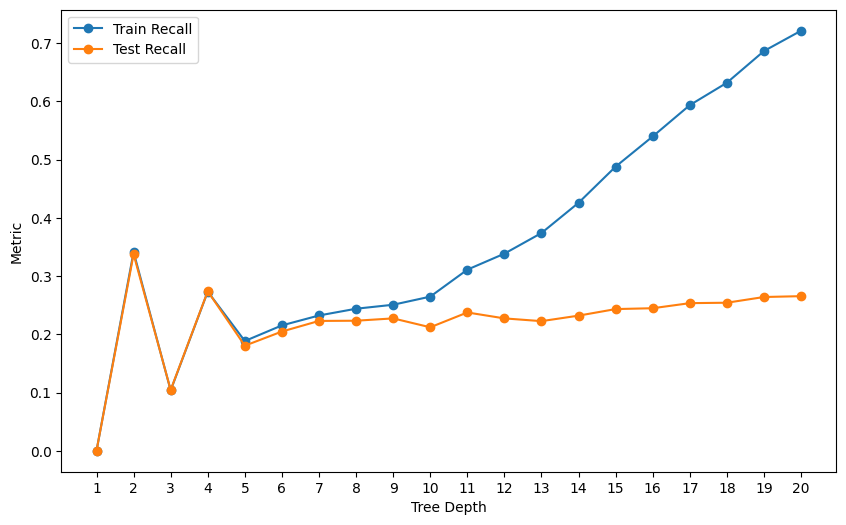

In [ ]:
depths = np.arange(1, 21)

train_recalls = []
test_recalls = []

# Train a decision tree for each depth
for depth in depths:
    d_t = DecisionTreeClassifier(max_depth=depth, random_state=72)
    d_t.fit(X_train, y_train)

    # Compute recall
    y_train_pred = d_t.predict(X_train)
    tr_recall_d_t = recall_score(y_train, y_train_pred)
    y_test_pred = d_t.predict(X_test)
    ts_recall_d_t = recall_score(y_test, y_test_pred)

    # Append results to lists
    train_recalls.append(tr_recall_d_t)
    test_recalls.append(ts_recall_d_t)

# Plot the train accuracy, test accuracy, and recall against tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_recalls, label='Train Recall', marker='o')
plt.plot(depths, test_recalls, label='Test Recall', marker='o')

plt.xticks(depths)
plt.xlabel('Tree Depth')
plt.ylabel('Metric')
plt.legend()
plt.show()

We choose max_depth = 2 as it has the highest test recall.

In [ ]:
d_t = DecisionTreeClassifier(max_depth=2)
d_t.fit(X_train, y_train)
y_pred_d_t = d_t.predict(X_test)
tr_accuracy_d_t = d_t.score(X_train, y_train)
ts_accuracy_d_t = d_t.score(X_test, y_test)

Similar step for the PCA-filtered dataset:

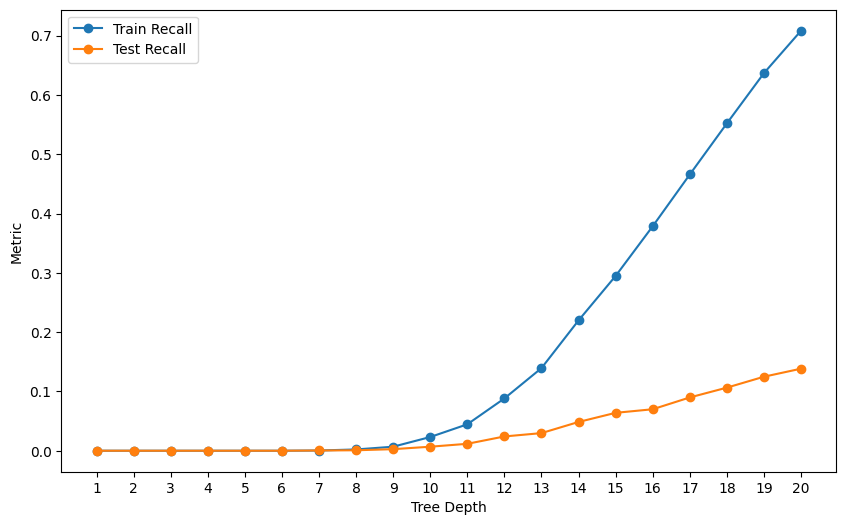

In [ ]:
depths = np.arange(1, 21)

train_recalls = []
test_recalls = []

# Train a decision tree for each depth
for depth in depths:
    d_t = DecisionTreeClassifier(max_depth=depth, random_state=72)
    d_t.fit(X_train_alt, y_train_alt)

    # Compute recall for training and test data
    y_train_pred = d_t.predict(X_train_alt)
    tr_recall_d_t = recall_score(y_train_alt, y_train_pred, average='binary')
    y_test_pred = d_t.predict(X_test_alt)
    ts_recall_d_t = recall_score(y_test_alt, y_test_pred, average='binary')

    # Append results to lists
    train_recalls.append(tr_recall_d_t)
    test_recalls.append(ts_recall_d_t)

# Find the depth with the highest test recall
best_depth = depths[np.argmax(test_recalls)]

# Plot train recall, and test recall against tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_recalls, label='Train Recall', marker='o')
plt.plot(depths, test_recalls, label='Test Recall', marker='o')

plt.xticks(depths)
plt.xlabel('Tree Depth')
plt.ylabel('Metric')
plt.legend()
plt.show()

For this case, we choose max_depth = 20 as it has the highest test recall.

In [ ]:
d_t_pca = DecisionTreeClassifier(max_depth=20)
d_t_pca.fit(X_train_alt, y_train_alt)
y_pred_d_t_pca = d_t_pca.predict(X_test_alt)
tr_accuracy_d_t_pca = d_t_pca.score(X_train_alt, y_train_alt)
ts_accuracy_d_t_pca = d_t_pca.score(X_test_alt, y_test_alt)

### **Suppport Vector Machine (SVM)**

SVM can be effective in high-dimensional spaces, and it focuses on maximizing the margin, which can help improve model generalization capabilities. Considering the high dimension of this dataset (after dimension reduction), SVM should be considered for this machine learning task.

Note: the following one code block could run for around 1 hour, or may not work on colab notebook.

In [ ]:
svm = SVC(kernel='linear',gamma='auto',probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
tr_accuracy_svm = svm.score(X_train, y_train)
ts_accuracy_svm = svm.score(X_test,y_test)

In [ ]:
svm_pca = SVC(kernel='linear',gamma='auto',probability=True)
svm_pca.fit(X_train_alt,y_train_alt)
y_pred_svm_pca = svm_pca.predict(X_test_alt)
tr_accuracy_svm_pca = svm_pca.score(X_train_alt, y_train_alt)
ts_accuracy_svm_pca = svm_pca.score(X_test_alt,y_test_alt)

### **K Nearest Neighbors (KNN)**

As a non-parametric method, KNN makes no assumptions about the data distribution, making it versatile for various data types. KNN can be very effective if the dataset has distinguishable groups. It would be useful to use KNN to check if it has such distinguishable groups.

In [ ]:
k=round(np.sqrt(len(X_train))) # k=sqrt(n), where n is the number of data in training set
knn = KNeighborsClassifier(k)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
tr_accuracy_knn = knn.score(X_train, y_train)
ts_accuracy_knn = knn.score(X_test,y_test)

In [ ]:
k_pca=round(np.sqrt(len(X_train_alt)))
knn_pca = KNeighborsClassifier(k_pca)
knn_pca.fit(X_train_alt,y_train_alt)
y_pred_knn_pca = knn_pca.predict(X_test_alt)
tr_accuracy_knn_pca = knn_pca.score(X_train_alt, y_train_alt)
ts_accuracy_knn_pca = knn_pca.score(X_test_alt,y_test_alt)

### **Perceptron**

Perceptron is a simple algorithm and it relies on a linear decision boundary, making it computationally efficient even on large datasets.

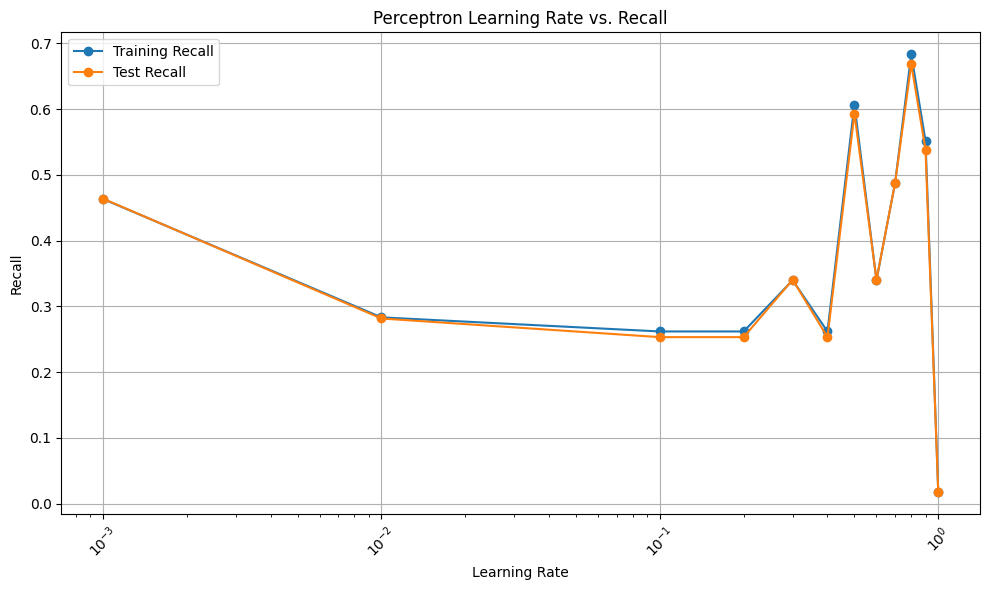

In [ ]:
# we first investigate which learning rate should be chosen by considering accuracy & recall metrics.
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

#After initial exxcuation of the code, it seems [0.1,1.0] interval should be further investigated.
extra_learning_rates = [0.2,0.3,0.4,0.6,0.7,0.8,0.9]
learning_rates.extend(extra_learning_rates)
learning_rates=sorted(learning_rates)
train_accuracies = []
test_accuracies = []
train_recalls = []
test_recalls = []

# Iterate over each learning rate
for lr in learning_rates:
    perceptron = Perceptron(eta0=lr, max_iter=1000)

    perceptron.fit(X_train, y_train)

    train_predictions = perceptron.predict(X_train)
    test_predictions = perceptron.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate recall
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)


plt.figure(figsize=(10, 6))
# Recall plot
plt.plot(learning_rates, train_recalls, marker='o', label='Training Recall')
plt.plot(learning_rates, test_recalls, marker='o', label='Test Recall')
plt.title('Perceptron Learning Rate vs. Recall')
plt.xlabel('Learning Rate')
plt.ylabel('Recall')
plt.xticks(learning_rates, rotation=45)
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.tight_layout()
plt.show()

From above figure, it seems we should take learning rate =0.8.

In [ ]:
pt = Perceptron(eta0=0.8)
pt.fit(X_train, y_train)
y_pred_pt = pt.predict(X_test)
tr_accuracy_pt = pt.score(X_train, y_train)
ts_accuracy_pt = pt.score(X_test,y_test)

In [ ]:
pt_pca = Perceptron(eta0=0.8)
pt_pca.fit(X_train_alt, y_train_alt)
y_pred_pt_pca = pt_pca.predict(X_test_alt)
tr_accuracy_pt_pca = pt_pca.score(X_train_alt, y_train_alt)
ts_accuracy_pt_pca = pt_pca.score(X_test_alt,y_test_alt)

## 5.2 Model Evaluation

Our evaluation metrics will be focusing on recall and f1-score. As the goal of our models will be predicting whether certain patients are in risk of heart disease, classifying a true patient as no such disease (FN) would be more troublesome / dangerous than FP. Hence, we aim to minimize false negative, using recall as an indicator.

However, while maximizing recall, we also need to keep the false positive within in a reasonable range as having high false positive will incorrectly classify more people as having heart disease. Therefore, f1-score will be a good indicator as it balances precision and recall by taking their harmonic mean.

We would consider both correlation matrix selected features, and PCA selected features, hence each model will be evaluated based on each of these two filtered datasets.

In short, we will be looking at the model with the highest recall, while ensuring a relatively high f1-score and testing accuracy.

### 5.2.1 Recall, precision, F1 score

In [ ]:
# Calculating metrics for each model
metrics = {
    "Recall": {
        "Logistic Regression": recall_score(y_test, y_pred_logReg),
        "Logistic Regression (PCA)": recall_score(y_test, y_pred_logReg_pca),
        "Decision Tree": recall_score(y_test, y_pred_d_t),
        "Decision Tree (PCA)": recall_score(y_test, y_pred_d_t_pca),
        "SVM": recall_score(y_test, y_pred_svm),
        "SVM (PCA)": recall_score(y_test, y_pred_svm_pca),
        "KNN": recall_score(y_test, y_pred_knn),
        "KNN (PCA)": recall_score(y_test, y_pred_knn_pca),
        "Perceptron": recall_score(y_test, y_pred_pt),
        "Perceptron (PCA)": recall_score(y_test, y_pred_pt_pca)
    },
    "Precision": {
        "Logistic Regression": precision_score(y_test, y_pred_logReg),
        "Logistic Regression (PCA)": precision_score(y_test, y_pred_logReg_pca),
        "Decision Tree": precision_score(y_test, y_pred_d_t),
        "Decision Tree (PCA)": precision_score(y_test, y_pred_d_t_pca),
        "SVM": precision_score(y_test, y_pred_svm),
        "SVM (PCA)": precision_score(y_test, y_pred_svm_pca),
        "KNN": precision_score(y_test, y_pred_knn),
        "KNN (PCA)": precision_score(y_test, y_pred_knn_pca),
        "Perceptron": precision_score(y_test, y_pred_pt),
        "Perceptron (PCA)": precision_score(y_test, y_pred_pt_pca)
    },
    "F1 Score": {
        "Logistic Regression": f1_score(y_test, y_pred_logReg),
        "Logistic Regression (PCA)": f1_score(y_test, y_pred_logReg_pca),
        "Decision Tree": f1_score(y_test, y_pred_d_t),
        "Decision Tree (PCA)": f1_score(y_test, y_pred_d_t_pca),
        "SVM": f1_score(y_test, y_pred_svm),
        "SVM (PCA)": f1_score(y_test, y_pred_svm_pca),
        "KNN": f1_score(y_test, y_pred_knn),
        "KNN (PCA)": f1_score(y_test, y_pred_knn_pca),
        "Perceptron": f1_score(y_test, y_pred_pt),
        "Perceptron (PCA)": f1_score(y_test, y_pred_pt_pca)
    }
}

# Convert dictionary to DataFrame for better display
results_df = pd.DataFrame(metrics)

print(results_df)


| |Recall|	Precision	|F1 Score|
|---|---|---|---|
|Logistic Regression|	0.243725|	0.562552	|0.340102|
|Logistic Regression (PCA)	|0.000728	|0.105263|	0.001445|
|Decision Tree	|0.279011	|0.309150|	0.293308|
|Decision Tree (PCA)	|0.061477|	0.051243|	0.055895|
|SVM	|0.000000|	0.000000|	0.000000|
|SVM (PCA)|	0.000000	|0.000000	|0.000000|
|KNN|	0.009458	|0.742857	|0.018678|
|KNN (PCA)|	0.000000	|0.000000	|0.000000|
|Perceptron|	0.668607	|0.198531|	0.306155|
|Perceptron (PCA)|	0.001091|	0.044118	|0.002130|

(default: use correlation matrix (Corr))

- Corr or PCA?

  From above table, Corr performs significantly better than PCA across all models evaluated except SVM, which gives all zero results.

- Under Corr, which model?

  SVM performed poorly. It seems just blindly predict the majority class. For the remaining models, considering recall as the first concern, Perceptron has the highest recall (approx. 0.67) while the second highest is only approx. 0.28, and in addition to that, Perceptron also has competitive F1 score. Hence, Perceptron has the best performance in this evaluation.

- Problem with the models

  All models except Perceptron have low recall, which will be our major concern that we will aim to address in the following sections.

### 5.2.2 Accuracy

Although accuracy is not the main focus of this dataset, it still worth checking accuracy figures, as we need to have a grasp of to what extent these models predict the target variable accurately.

In [ ]:
data = [["Log Reg", tr_accuracy_logReg,ts_accuracy_logReg,tr_accuracy_logReg_pca,ts_accuracy_logReg_pca],
        ["Decision Tree", tr_accuracy_d_t,ts_accuracy_d_t,tr_accuracy_d_t_pca,ts_accuracy_d_t_pca],
        ["SVM",tr_accuracy_svm,ts_accuracy_svm,tr_accuracy_svm_pca,ts_accuracy_svm_pca],
        ["KNN", tr_accuracy_knn,ts_accuracy_knn,tr_accuracy_knn_pca,ts_accuracy_knn_pca],
        ["Perceptron",tr_accuracy_pt,ts_accuracy_pt,tr_accuracy_pt_pca,ts_accuracy_pt_pca]]

col_names = ["Model", "Corr Training accuracy", "Corr Testing Accuracy","PCA Training accuracy", "PCA Testing Accuracy"]
print(tabulate(data, headers=col_names))

| Model | Corr Training Accuracy |Corr Testing Accuracy |PCA Training Accuracy|PCA Testing Accuracy|
| --- | --- | --- |---|---|
| Log Reg |  0.948287 | 0.94716|0.945193|0.945676|
|Decision Tree  | 0.945736 |0.944843|0.982414|0.908261|
|SVM|0.945706 | 0.944132|0.945254|0.94594|
|KNN  | 0.946016 | 0.944477|0.945254|0.94594|
|Perceptron|0.830411| 0.830688|0.944436|0.945249|


The first four models have similar training and test accuracy between 94% and 95%. Compared with the rest, Perceptron has both lower (not siginificantly) training and testing accuracy when using correlation matrix, while comparable accuracy when using PCA.

There isn't much difference between models or data pre-possessing methods (Corr or PCA) simply by observing accuracy. Hence, we could focus on other metrics.

### 5.2.3 Confusion Matrix

Confusion matrix gives us a detailed picutre about TP & TN & FP & FN, which complements the metrics in 5.2.1.

In [ ]:
cm_logReg = confusion_matrix(y_test,y_pred_logReg)
cm_dt = confusion_matrix(y_test,y_pred_d_t)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_pt = confusion_matrix(y_test,y_pred_pt)

fig, axs = plt.subplots(2,3, figsize=(18,10))

plot_confusion_matrix(axs[0,0], cm_logReg, title='Logistic Regression')
plot_confusion_matrix(axs[0,1], cm_dt, title='Decision Tree')
plot_confusion_matrix(axs[0,2], cm_svm, title='SVM')
plot_confusion_matrix(axs[1,0], cm_knn, title='kNN')
plot_confusion_matrix(axs[1,1], cm_pt, title='Perceptron')

axs[1][2].set_visible(False)

fig.suptitle('Confusion Matrices when using correlation matrix', fontsize=20)
plt.tight_layout()
plt.show()

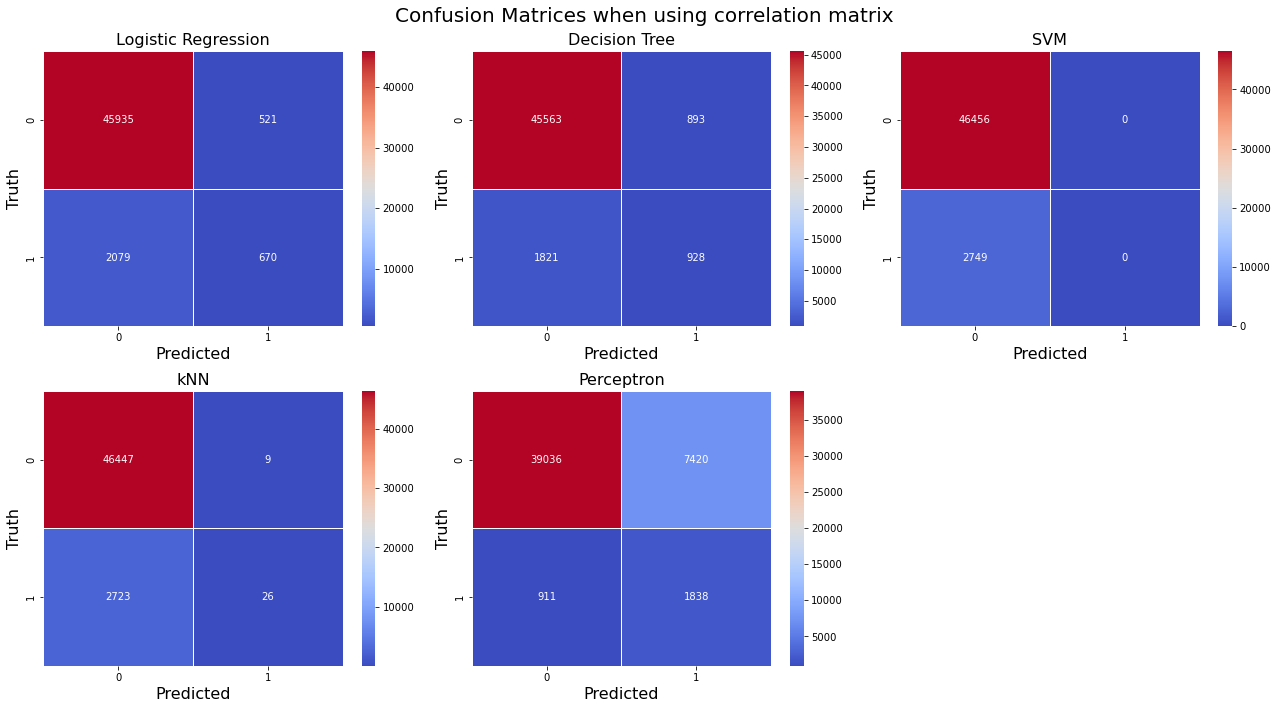

The following is for the dataset generated by PCA selected features, and confusion matrices are for each model using this dataset.

In [ ]:
cm_logReg_pca = confusion_matrix(y_test_alt,y_pred_logReg_pca)
cm_dt_pca = confusion_matrix(y_test_alt,y_pred_d_t_pca)
cm_svm_pca = confusion_matrix(y_test_alt,y_pred_svm_pca)
cm_knn_pca = confusion_matrix(y_test_alt,y_pred_knn_pca)
cm_pt_pca = confusion_matrix(y_test_alt,y_pred_pt_pca)

fig, axs = plt.subplots(2,3, figsize=(18,10))

plot_confusion_matrix(axs[0,0], cm_logReg_pca, title='Logistic Regression')
plot_confusion_matrix(axs[0,1], cm_dt_pca, title='Decision Tree')
plot_confusion_matrix(axs[0,2], cm_svm_pca, title='SVM')
plot_confusion_matrix(axs[1,0], cm_knn_pca, title='kNN')
plot_confusion_matrix(axs[1,1], cm_pt_pca, title='Perceptron')

axs[1][2].set_visible(False)

fig.suptitle('Confusion Matrices when using PCA', fontsize=20)
plt.tight_layout()
plt.show()

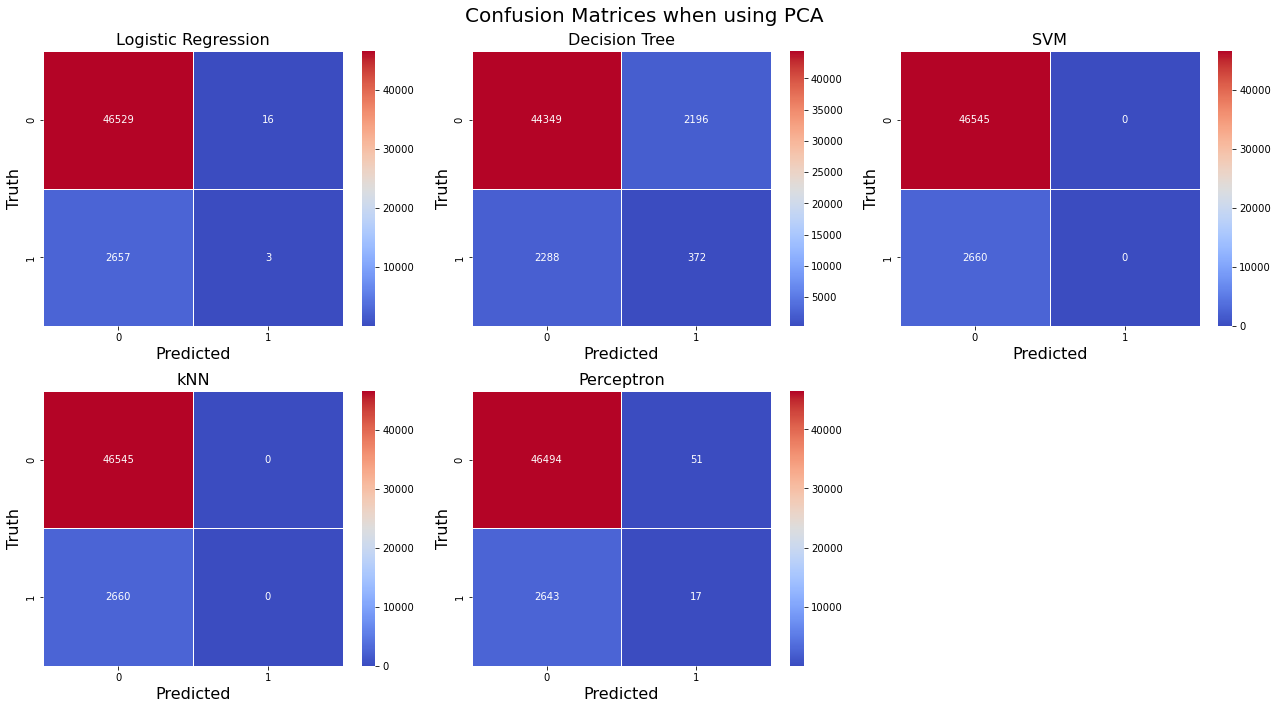

The confusion matrices shows that Logistic Regression, Decision Tree, SVM, and KNN have high false positive. While Perceptron has a lower false positive, it suffered from high false negative.

Models trained by PCA have much larger false positive and false negative.

In short, the result from confusion matrix coincides with the result in 5.2.1.

### 5.2.4 ROC Curve

The Perceptron algorithm does not model the probability distribution of the data, therefore, we cannot plot the ROC curve of the Perceptron model. Hence we plot the other four. The following code block is for Correlation matrix

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], logReg, X_test, y_test, label='Logistic Regression')
plot_roc_auc(axs[0,1], d_t, X_test, y_test, label='Decison Tree')
plot_roc_auc(axs[1,0], svm, X_test, y_test, label='SVM')
plot_roc_auc(axs[1,1], knn, X_test, y_test, label='KNN')

fig.suptitle('ROC Curve when using correlation matrix', fontsize=20)
plt.tight_layout()
plt.show()

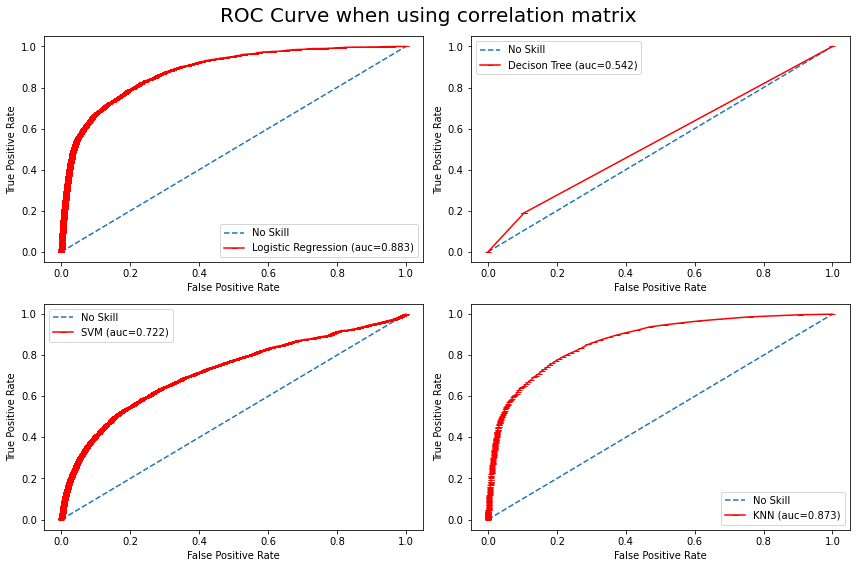

Again use dataset generated by PCA selected features:

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], logReg_pca, X_test_alt, y_test_alt, label='Logistic Regression')
plot_roc_auc(axs[0,1], d_t_pca, X_test_alt, y_test_alt, label='Decison Tree')
plot_roc_auc(axs[1,0], svm_pca, X_test_alt, y_test_alt, label='SVM')
plot_roc_auc(axs[1,1], knn_pca, X_test_alt, y_test_alt, label='KNN')

fig.suptitle('ROC Curve when using PCA', fontsize=20)
plt.tight_layout()
plt.show()

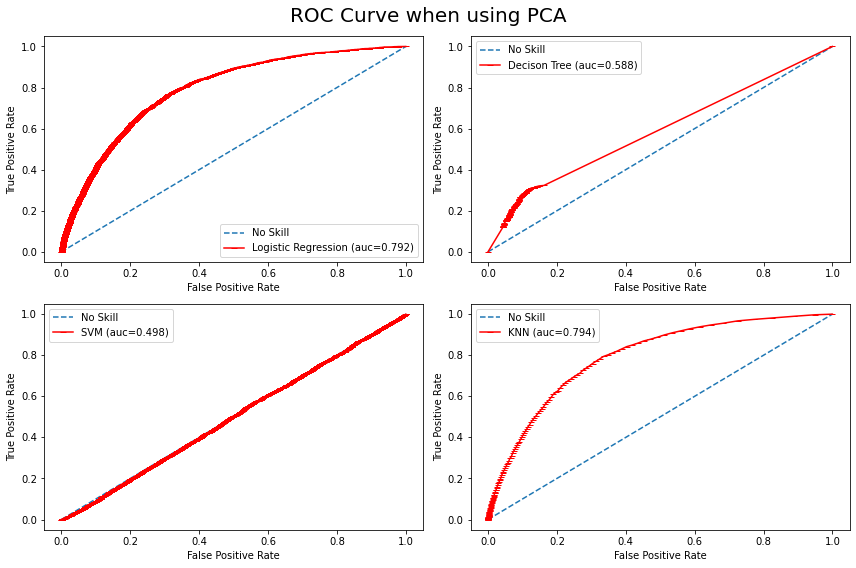

Corr models have higher AUC than PCA models except for decision tree, for which the AUC for PCA model is slightly higher. This indicates that Corr models are more accurate than PCA models, and more accurate than chance.

## 5.3 Evaluation Result
The selection criteria is that, recall as the first consideration, while other metrics such as F1 score and accuracy would also play a role.

This basically follows from the arguments in 5.2.1. Perceptron would be the best model in the evaluation.

(For the rest of the project, we will proceed with the dataset selected using correlation matrix.)


# 6 Handling Imbalanced Dataset
As observed in 5.2.1 and 5.2.3, the models have low recall and false negatives. This is due to the imbalanced nature of the dataset, as it leads to the problem of the models overfitting to the majority group, resulting in low recall and low f1-score, we consider two methods to handle class imbalance: resampling and class weights.

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC

## 6.0 Helper Functions

In [ ]:
def baseline_models(data=[],models=[DecisionTreeClassifier(max_depth=2),LogisticRegression(),
            SVC(kernel='linear',gamma='auto'),KNeighborsClassifier(),Perceptron(eta0=0.8)], verbose=False,k=10):
    if len(data)== 2:
        X_train, X_test, y_train, y_test = train_test_split(data[0],data[1],random_state=123)
    else:
        X_train, X_test, y_train, y_test = data[0],data[1],data[2],data[3]

    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []

    for model in models:
        clf = model
        clf.fit(X_train, y_train)
        test_preds = clf.predict(X_test)
        f1.append(f1_score(y_test, test_preds))
        accuracy.append(accuracy_score(y_test, test_preds))
        auc.append(roc_auc_score(y_test, test_preds))
        recall.append(recall_score(y_test, test_preds))
        precision.append(precision_score(y_test, test_preds))
        if verbose:
            print('Classification Model: ',model,'\n')
            print(classification_report(y_test, test_preds),'\n')

    results = pd.DataFrame([f1,auc, accuracy, precision,recall],
                      index= ['f1','roc_auc','accuracy','precision','recall',],
                           columns=['DecisionTree','LogisticRegression','SVM','KNN','Perceptron'])
    return results.transpose()

## 6.1 Resampling
For resampling, we only consider oversampling as undersampling would cause a significant loss of training data.

Two oversampling techniques are used: random oversampling and SMOTE-NC.

### 6.1.1 Random Oversampling
We first consider random oversampling, which duplicates the instances in the minority class.

In [ ]:
pd.DataFrame(y_train,columns=['HadHeartAttack']).HadHeartAttack.value_counts(normalize=True)

HadHeartAttack
0.0    0.945706
1.0    0.054294
Name: proportion, dtype: float64

The target incidence is highly imbalanced, we perform a random oversampling on the training set.

In [ ]:
train_df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train)], axis=1)
train_df.columns = list(range(train_df.shape[1]))

majority_class = train_df[train_df[train_df.columns[-1]] == 0]
minority_class = train_df[train_df[train_df.columns[-1]] == 1]

minority_upsampled = resample(minority_class,
                               replace=True,
                               n_samples=len(majority_class),
                               random_state=123)

train_df_upsampled = pd.concat([majority_class, minority_upsampled])

train_df_upsampled = train_df_upsampled.sample(frac=1, random_state=92)

X_train_upsampled = train_df_upsampled.iloc[:, :-1].values
y_train_upsampled = train_df_upsampled.iloc[:, -1].values

In [ ]:
pd.DataFrame(y_train_upsampled,columns=['HadHeartAttack']).HadHeartAttack.value_counts(normalize=True)

HadHeartAttack
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

After applying random oversampling on the training dataset, the new target incidence becomes balanced.

In [ ]:
results1 = baseline_models(data=[X_train_upsampled, X_test, y_train_upsampled, y_test],k=round(np.sqrt(len(X_train_upsampled))))
results1.sort_values('recall',ascending=False)

| | f1|	roc_auc|	accuracy|	precision|	recall|
|---|---|---|---|---|---|
|Perceptron|	0.200628	|0.736745	|0.606951|	0.113173|	0.882866|
|LogisticRegression|	0.334742|	0.793971|	0.833594	|0.215504|	0.749363|
|SVM|	0.364251|	0.788677	|0.862372|	0.245476|	0.705711|
|KNN|	0.302838|	0.709263	|0.861701|	0.210782|	0.537650|
|DecisionTree|	0.481694	|0.734955|	0.939295|	0.460518|	0.504911|

Comparing to the result of the original training dataset:

In [ ]:
results2 = baseline_models(data=[X_train, X_test, y_train, y_test])
results2.sort_values('recall',ascending=False)

|  | f1 | roc_auc | accuracy | precision | recall |
| --- | --- | --- | --- | --- | --- |
|Perceptron	|0.306155	|0.754443	|0.830688	|0.198531	|0.668607|
|DecisionTree|	0.406127	|0.659177|	0.944843	|0.509610|	0.337577|
|LogisticRegression	|0.340102|	0.616255|	0.947160|	0.562552|	0.243725|
|KNN	|0.292265|	0.598605|	0.942912	|0.475410|	0.210986|
|SVM|0.000000|	0.500000|	0.944132|	0.000000|	0.000000|

Models trained with random oversampled data have significantly improved recall. Although the accuracy and f1-score decreased, increased recall indicates that the upsampled models perform better based on our evaluation metrics as stated in 5.2. Among these models, Logistic Regression performs the best with the highest recall of 0.75 and an acceptable f1-score of 0.33 and accuracy of 0.83. It also performs better than the original Perceptron model, with higher recall. Although Perceptron after random oversampling has higher recall than Logistic Regression, we will not select Perceptron as it has a low f1-score of 0.20.

However, random oversampling may lead to overfitting, where the model becomes too specific to the training data and may not generalize well to new data. The reason is that random oversampling does not add new information to the dataset. The new samples are generated by duplicating existing data. Hence, they do not provide further details about the minority class or classes, and instead, it might just increase their noise. Therefore, we will explore other models to deal with imbalancing.

### 6.1.2 SMOTE-NC
SMOTE is not suitable since our dataset consist numerical features. Therefore, we use SMOTE-NC, which generates synthetic data for categorical as well as quantitative features in the dataset.

In [ ]:
cat_col_index = list(range(1,11))
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=1)
X_trainres, y_trainres = sm.fit_resample(X_train, y_train)

In [ ]:
pd.DataFrame(y_trainres,columns=['HadHeartAttack']).HadHeartAttack.value_counts(normalize=True)

HadHeartAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

After applying SMOTE-NC on the training dataset, the new target incidence becomes balanced.

In [ ]:
results3 = baseline_models(data=[X_trainres, X_test, y_trainres, y_test],k=round(np.sqrt(len(X_trainres))))
results3.sort_values('recall',ascending=False)

| | f1|	roc_auc|	accuracy|	precision|	recall|
|---|---|---|---|---|---|
|KNN	|0.284071	|0.777814	|0.792562|	0.174614	|0.761278
|LogisticRegression|	0.307585	|0.785141	|0.817823|	0.193564|	0.748496
|SVM|	0.314942|	0.783691	|0.827152	|0.200410	|0.734962
|Perceptron	|0.268157|	0.757577|	0.785794	|0.164452	|0.725940
|DecisionTree|0.264216|	0.627306	|0.904806|	0.226929	|0.316165


Comparing to the result of the original training dataset:

|  | f1 | roc_auc | accuracy | precision | recall |
| --- | --- | --- | --- | --- | --- |
|Perceptron	|0.306155	|0.754443	|0.830688	|0.198531	|0.668607|
|DecisionTree|	0.406127	|0.659177|	0.944843	|0.509610|	0.337577|
|LogisticRegression	|0.340102|	0.616255|	0.947160|	0.562552|	0.243725|
|KNN	|0.292265|	0.598605|	0.942912	|0.475410|	0.210986|
|SVM|0.000000|	0.500000|	0.944132|	0.000000|	0.000000|

Similar to the result of random oversampling, SMOTE-NC generates models with higher recall and lower f1-score and accuracy. The best model is Logistic Regression with a recall of 0.74, f1-score of 0.31, and accuracy of 0.82. (Similar to Random Oversampling, we do not select Perceptron due to low f1-score.)

## 6.2 Class weights
Besides resampling, we also considered assigning more weights on the minority class so that the models will not overfit to the majority class when training. There is no class_weight parameter in kNN so we only experimented with the other four basic models.

In [ ]:
mod_logReg_weighted = LogisticRegression(class_weight="balanced")
mod_logReg_weighted.fit(X_train, y_train)
tr_accuracy_logReg_weighted = mod_logReg_weighted.score(X_train, y_train)
ts_accuracy_logReg_weighted = mod_logReg_weighted.score(X_test, y_test)
print('Training accuracy:', tr_accuracy_logReg_weighted)
print('Testing accuracy:', ts_accuracy_logReg_weighted)
y_pred_logReg_weighted = mod_logReg_weighted.predict(X_test)
print("Classification Report for log reg: \n", classification_report(y_test, y_pred_logReg_weighted))

Training accuracy: 0.8332715161800047
Testing accuracy: 0.833594146936287
Classification Report for log reg: 
               precision    recall  f1-score   support

         0.0       0.98      0.84      0.90     46456
         1.0       0.22      0.75      0.33      2749

    accuracy                           0.83     49205
   macro avg       0.60      0.79      0.62     49205
weighted avg       0.94      0.83      0.87     49205



We assigned the class_weight parameter to "balanced" to put more weights to the minority class. Comparing to the results of not using the class_weight parameter:


In [ ]:
print('Training accuracy:', tr_accuracy_logReg)
print('Testing accuracy:', ts_accuracy_logReg)
print("Classification Report for log reg: \n", classification_report(y_test, y_pred_logReg))

Training accuracy: 0.9482869874045433
Testing accuracy: 0.9471598414795245
Classification Report for log reg: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46456
         1.0       0.56      0.24      0.34      2749

    accuracy                           0.95     49205
   macro avg       0.76      0.62      0.66     49205
weighted avg       0.93      0.95      0.94     49205



While the accuracy dropped, there is an significant increase in recall, indicating that class_weight is effective.

However, the "balanced" class_weight parameter may not be the most effective one as it is decided purely by the number of instances of each feature group. Therefore, we deciced to experiment on different values of class_weight.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
y=y_train
v=compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
print("Normalized balanced class weight:",v/sum(v))

Normalized balanced class weight: [0.05429409 0.94570591]


Using "balanced" class_weight parameter is the same as assigning $ \{0:0.05429409,1:0.94570591\}$ to class_weight.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Data generation and grid search for the first subplot (recall)
lr = LogisticRegression(solver='newton-cg')
weights = np.linspace(0.0, 0.99, 200)
param_grid_recall = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}
gridsearch_recall = GridSearchCV(estimator=lr,
                                 param_grid=param_grid_recall,
                                 cv=StratifiedKFold(),
                                 n_jobs=-1,
                                 scoring='recall',
                                 verbose=2).fit(X_train, y_train)
recall_scores = gridsearch_recall.cv_results_['mean_test_score']
recall_weights = 1 - weights

# Data generation and grid search for the second subplot (F1 score)
param_grid_f1 = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}
gridsearch_f1 = GridSearchCV(estimator=lr,
                             param_grid=param_grid_f1,
                             cv=StratifiedKFold(),
                             n_jobs=-1,
                             scoring='f1',
                             verbose=2).fit(X_train, y_train)
f1_scores = gridsearch_f1.cv_results_['mean_test_score']
f1_weights = 1 - weights

# Plotting both subplots with equal size
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1])

# Recall subplot
plt.subplot(gs[0])
sns.lineplot(recall_weights, recall_scores)
plt.xlabel('Weight for class 1')
plt.ylabel('Recall')
plt.xticks([round(i / 10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights (Recall)', fontsize=16)

# F1 score subplot
plt.subplot(gs[1])
sns.lineplot(f1_weights, f1_scores)
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i / 10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights (F1 score)', fontsize=16)

plt.tight_layout()
plt.show()


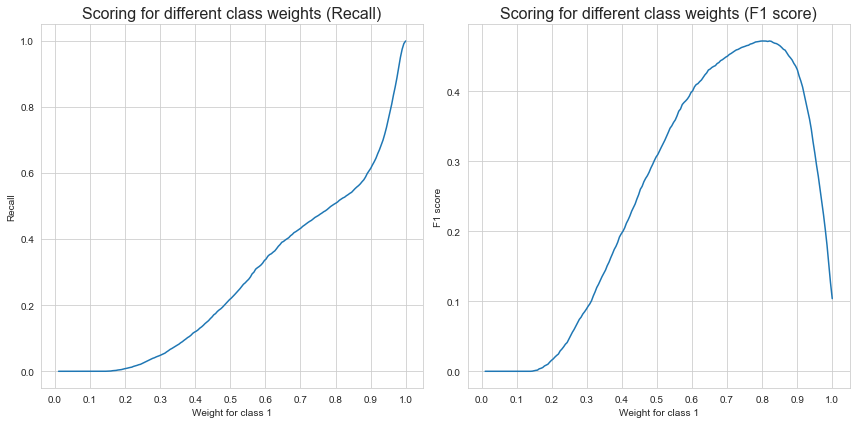

In [ ]:
print("Weight at maximum f1-score:",f1_weights[np.argmax(f1_scores)])
print("Range of weights with f1-score >=0.3:","[",f1_weights[np.where(f1_scores >= 0.3)[0]][-1],",",f1_weights[np.where(f1_scores >= 0.3)[0]][0],"]")

The weight at maximum f1-score is 0.7960301507537688 and the range of weights with f1-score >=0.3 is $[ 0.4676884422110552 , 0.9552261306532663 ]$.



We plot the values of recall and f1-score as the weight for the minority class changed from 0 to 1. While recall displays an increasing trend, f1-score reaches maximum at 0.80 and is within an acceptable range of above 0.3 between 0.47 and 0.96. Therefore, we conclude that assigning class_weight to "balanced" can be an optimal choice as it balances recall and f1-score. For the rest of the basic models, we will continue with using the "balanced" class_weight parameter since they display simalar recall-weight and f1-weight curves.

In [ ]:
d_t_weighted = DecisionTreeClassifier(class_weight="balanced",max_depth=2)
d_t_weighted.fit(X_train, y_train)
tr_accuracy_d_t_weighted = d_t_weighted.score(X_train, y_train)
ts_accuracy_d_t_weighted = d_t_weighted.score(X_test,y_test)
print("Train Accuracy:", tr_accuracy_d_t_weighted)
print("Test Accuracy:", ts_accuracy_d_t_weighted)
y_pred_d_t_weighted = d_t_weighted.predict(X_test)
print("Classification Report for decision tree: \n", classification_report(y_test, y_pred_d_t_weighted))

In [ ]:
svm_weighted = SVC(kernel='linear',gamma='auto',class_weight="balanced") #soft margin SVM, default C=1.0
svm_weighted.fit(X_train, y_train)
tr_accuracy_svm_weighted = svm_weighted.score(X_train, y_train)
ts_accuracy_svm_weighted = svm_weighted.score(X_test,y_test)
print('Training accuracy:', tr_accuracy_svm_weighted)
print('Testing accuracy:', ts_accuracy_svm_weighted)
y_pred_svm_weighted = svm_weighted.predict(X_test)
print("Classification Report for SVM: \n", classification_report(y_test, y_pred_svm_weighted))

In [ ]:
pt_weighted = Perceptron(eta0=0.8,class_weight="balanced")
pt_weighted.fit(X_train, y_train)
tr_accuracy_pt_weighted = pt_weighted.score(X_train, y_train)
ts_accuracy_pt_weighted = pt_weighted.score(X_test,y_test)
print('Training accuracy:', tr_accuracy_pt_weighted)
print('Testing accuracy:', ts_accuracy_pt_weighted)
y_pred_pt_weighted = pt_weighted.predict(X_test)
print("Classification Report for Perceptron: \n", classification_report(y_test, y_pred_pt_weighted))

In [ ]:
results4 = baseline_models(data=[X_train, X_test, y_train, y_test],models=[DecisionTreeClassifier(class_weight="balanced"),LogisticRegression(class_weight="balanced"),
            SVC(kernel='linear',gamma='auto',class_weight="balanced"),Perceptron(class_weight="balanced")])
results4.sort_values('recall',ascending=False)

||f1|	roc_auc|	accuracy	|precision|	recall|
|---|---|---|---|---|---|
|Perceptron	|0.170296|	0.708721|	0.508282|	0.093695	|0.933459
|LogisticRegression|	0.327237|	0.794025|	0.833289	|0.209273|	0.750000
|DecisionTree	|0.481694|	0.734955	|0.939295	|0.460518|	0.504911
|SVM	|0.000000	|0.500000|0.945940|0.000000|0.000000



Compare to the result of the models without class_weight:

|  | f1 | roc_auc | accuracy | precision | recall |
| --- | --- | --- | --- | --- | --- |
|Perceptron	|0.306155	|0.754443	|0.830688	|0.198531	|0.668607|
|DecisionTree|	0.406127	|0.659177|	0.944843	|0.509610|	0.337577|
|LogisticRegression	|0.340102|	0.616255|	0.947160|	0.562552|	0.243725|
|SVM|0.000000|	0.500000|	0.944132|	0.000000|	0.000000|

Class_weight improved recall. Although Perceptron has the highest recall, its accuracy of 0.51 and f1-score of 0.17 are too low, generating highly inaccurare result for non-heart disease testing data. Therefore, we select Logistic Regression as the best model with a recall of 0.75, f1-score of 0.33, and accuracy of 0.83.

# 7 Advanced Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 7.1 Random Forest


As an ensemble of decision trees, random forest can reduce the risk of overfitting associated with individual decision trees by averaging multiple trees' predictions. Random forest offers improved accuracy and robustness compared to a single decision tree, making it a strong candidate for complex datasets. In training decision tree (5.1), tuning max_depth parameter could prevent overfitting, yet random forest is more robust against overfitting and variations in data due to its ensemble nature.

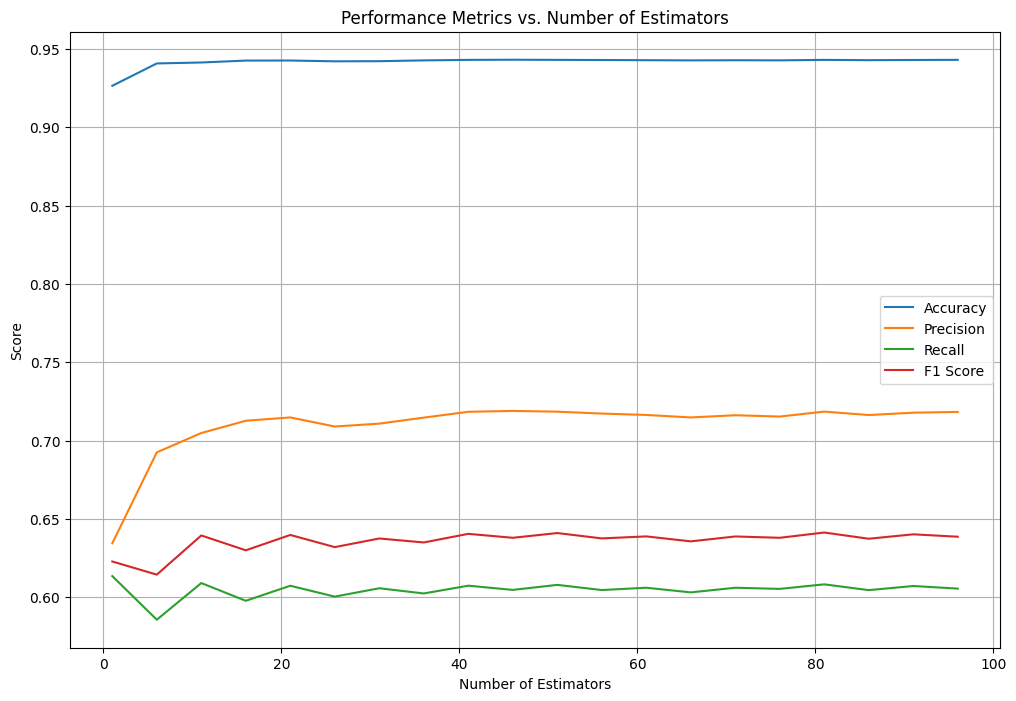

In [ ]:
n_estimators_range = range(1, 101,5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # predictions on testing data
    y_pred = rf_classifier.predict(X_test)

    # evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Plot the performance metrics against n_estimators
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, precision_scores, label='Precision')
plt.plot(n_estimators_range, recall_scores, label='Recall')
plt.plot(n_estimators_range, f1_scores, label='F1 Score')

plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

Add class weight to address imbalanced data:

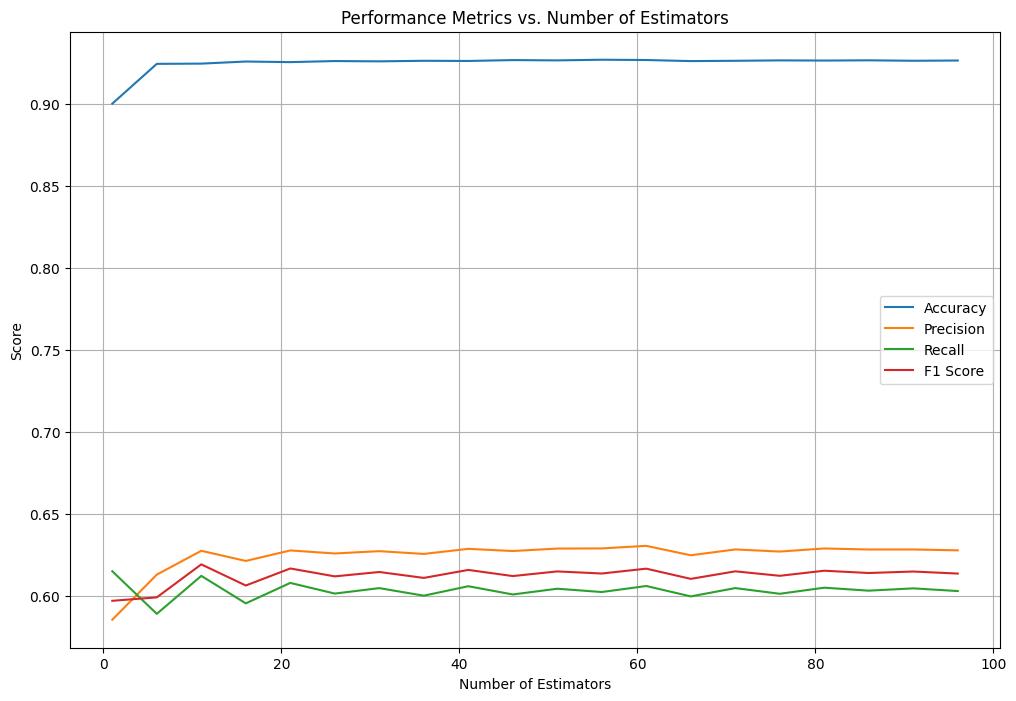

In [ ]:
n_estimators_range = range(1, 101, 5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=77, class_weight='balanced')

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predictions on testing data
    y_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Plot the performance metrics against n_estimators
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, precision_scores, label='Precision')
plt.plot(n_estimators_range, recall_scores, label='Recall')
plt.plot(n_estimators_range, f1_scores, label='F1 Score')

plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

From the above plot, it seems that using class weights does not improve the performance of random forest. It might due to that random forest, as an ensemble method, tends to be robust against class imbalances. Its structure of multiple decision trees, each trained on random subsets of data, can mitigate the impact of imbalances without additional class weights.

While having similar recall curves, the models without class weight have higher precision, recall, and f1-score. Therefore, we will select the unweighted model with the highest recall.

In [ ]:
rf_result=pd.DataFrame({'n_estimators':n_estimators_range,'accuracy':accuracy_scores,'precision':precision_scores,'recall':recall_scores,'f1 score':f1_scores})
rf_result[rf_result['recall']==max(rf_result['recall'])]

||n_estimators|	accuracy|	precision|	recall|	f1 score|
|---|---|---|---|---|---|
|0|	1	|0.926573	|0.634345|	0.613395	|0.622715|



## 7.2 Gradient Boosting


Gradient Boosting constructs an ensemble of weak prediction models to create a final model with strong predictive accuracy. Each new tree corrects errors made by previously trained trees. Unlike Random Forests which build each tree independently while training, Gradient Boosting builds one tree at a time. This approach allows for the minimization of errors sequentially, often leading to better performance than bagging techniques.




**A. Standard Gradient Boosting**:
Typical way to train on the original imbalanced dataset

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)

# Train the classifier
gb_clf.fit(X_train, y_train)

# predictions on the training set
y_train_pred = gb_clf.predict(X_train)

# predictions on the test set
y_test_pred = gb_clf.predict(X_test)

# training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 95.00%
Test Accuracy: 94.83%



**B. Gradient Boosting with SMOTE-NC**: Balance classes before training



In [ ]:
# Define the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.7, random_state=123)

# Train the classifier with the resampled data
gb_clf.fit(X_trainres, y_trainres)

# Make predictions on the training set
y_train_pred = gb_clf.predict(X_trainres)

# Make predictions on the test set
y_test_pred = gb_clf.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_trainres, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Training Accuracy: 90.81%
Test Accuracy: 91.79%


After grid search and parameter tuning, random state 77, n_estimator 250 and learning rate 0.7 gives the highest accuracy of 95.60%



**C.Class_weight=balanced Gradient Boosting**: Give more importance to the minority class instances.

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
# Compute the balanced sample weights
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)

# Fit the model using the sample weights
gb_clf.fit(X_train, y_train, sample_weight=sample_weight)

# Now you can make predictions and evaluate the model as usual
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

# training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 82.04%
Test Accuracy: 81.92%


Since Accuracy may not be the best option to evaluate the performance, we will examine the perfromance metrics and confusion matrix to evaluate the performance. From there, we select the best way to run gradient boosting and then tune the parameters.

Option A - Precision: 0.60 - Recall: 0.23 - F1 Score: 0.34 - ROC-AUC: 0.89


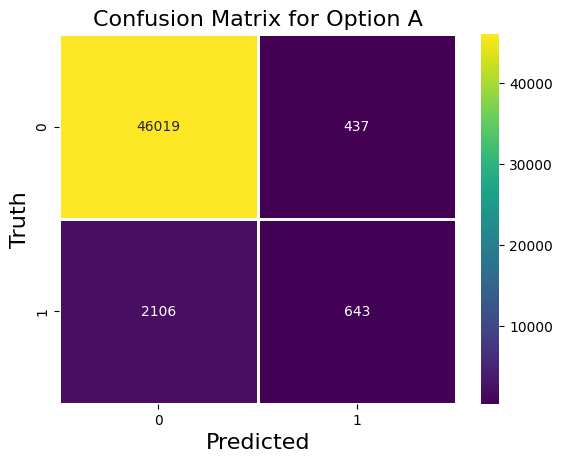

Option B - Precision: 0.48 - Recall: 0.47 - F1 Score: 0.48 - ROC-AUC: 0.87


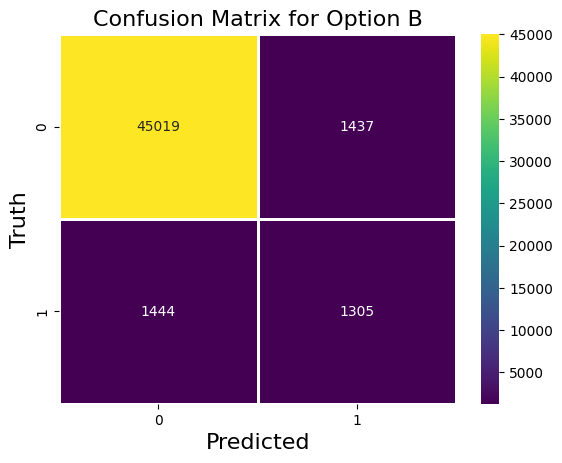

Option C - Precision: 0.20 - Recall: 0.77 - F1 Score: 0.32 - ROC-AUC: 0.89


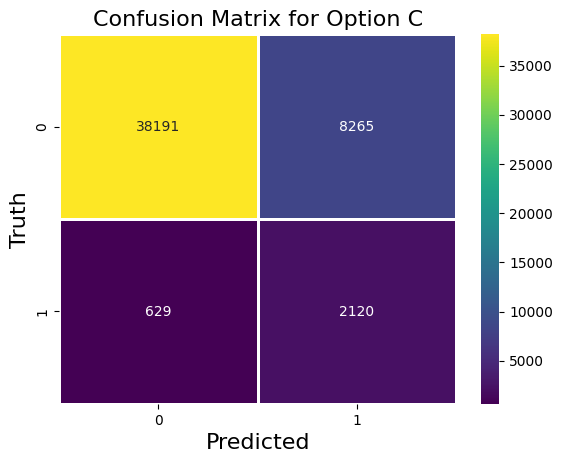

In [ ]:
# Option A: Standard Training
gb_clf_a = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)
gb_clf_a.fit(X_train, y_train)
y_test_pred_a = gb_clf_a.predict(X_test)
y_proba_a = gb_clf_a.predict_proba(X_test)[:, 1]

# Option B: Training with SMOTE-NC
cat_col_index = list(range(1,11))
smote = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
gb_clf_b = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)
gb_clf_b.fit(X_train_res, y_train_res)
y_test_pred_b = gb_clf_b.predict(X_test)
y_proba_b = gb_clf_b.predict_proba(X_test)[:, 1]

# Option C: Training with Sample Weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_clf_c = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)
gb_clf_c.fit(X_train, y_train, sample_weight=sample_weights)
y_test_pred_c = gb_clf_c.predict(X_test)
y_proba_c = gb_clf_c.predict_proba(X_test)[:, 1]

# Define a function to calculate metrics and plot confusion matrix
def evaluate_and_plot_cm(model, X_train, y_train, X_test, y_test, label):
    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # Probability scores

    # Calculate metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)  # Use probability scores

    # Print metrics
    print(f"{label} - Precision: {precision:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f} - ROC-AUC: {roc_auc:.2f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    fig, ax = plt.subplots()
    plot_confusion_matrix(ax, cm, title=f'Confusion Matrix for {label}')
    plt.show()

# Evaluate and plot confusion matrix for each option
evaluate_and_plot_cm(gb_clf_a, X_train, y_train, X_test, y_test, 'Option A')
evaluate_and_plot_cm(gb_clf_b, X_train_res, y_train_res, X_test, y_test, 'Option B')
evaluate_and_plot_cm(gb_clf_c, X_train, y_train, X_test, y_test, 'Option C')  # assuming gb_clf_c is fitted with sample weights


Option B might be a good starting point for further tuning, given that it has the highest F1 score, indicating a balance which might be more useful in practical scenarios where both false positives and false negatives have significant costs. Therefore, we will further tune the hyperparameters using option B by conducting a grid search.


To find the optimal combination of n_estimator and learning rate, we conduct a grid search by iterating over a predefined range of values for both n_estimators and learning_rate to find the best combination with the highest recall and reasonable f1-score.



In [ ]:
from sklearn.metrics import f1_score, recall_score, make_scorer

# Assuming X_train_res, y_train_res are from Option B (SMOTE-NC)

# Define the Gradient Boosting Classifier
gb_clf_b = GradientBoostingClassifier(random_state=123)

# Define scoring functions
scoring = {
    'F1': make_scorer(f1_score),
    'Recall': make_scorer(recall_score)
}

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_clf_b,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='F1',  # Choose one metric to use for refitting
                           cv=5,
                           verbose=2,
                           n_jobs=-1,
                           return_train_score=False)

# Fit the grid search model
grid_search.fit(X_train_res, y_train_res)

# Extract the results
f1_scores = grid_search.cv_results_['mean_test_F1']
recall_scores = grid_search.cv_results_['mean_test_Recall']
params = grid_search.cv_results_['params']

# Prepare the results for plotting
plot_data_f1 = [(p['n_estimators'], p['learning_rate'], score)
                for p, score in zip(params, f1_scores)]
plot_data_recall = [(p['n_estimators'], p['learning_rate'], score)
                    for p, score in zip(params, recall_scores)]

# Sort the results for plotting
plot_data_f1 = sorted(plot_data_f1, key=lambda x: (x[0], x[1]))
plot_data_recall = sorted(plot_data_recall, key=lambda x: (x[0], x[1]))

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(param_grid['n_estimators'])))

# Plot F1 scores
for (n_estimators, color) in zip(param_grid['n_estimators'], colors):
    filtered_results_f1 = [data for data in plot_data_f1 if data[0] == n_estimators]
    lrates = [res[1] for res in filtered_results_f1]
    scores = [res[2] for res in filtered_results_f1]
    ax1.plot(lrates, scores, color=color, marker='o', linestyle='-', label=f'n_estimators={n_estimators}')

# Plot Recall scores
for (n_estimators, color) in zip(param_grid['n_estimators'], colors):
    filtered_results_recall = [data for data in plot_data_recall if data[0] == n_estimators]
    lrates = [res[1] for res in filtered_results_recall]
    scores = [res[2] for res in filtered_results_recall]
    ax2.plot(lrates, scores, color=color, marker='o', linestyle='-', label=f'n_estimators={n_estimators}')

# Set titles, labels, and legends
ax1.set_title('Test F1 Score vs Learning Rate')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Mean Test F1 Score')
ax1.legend()
ax1.grid(True)

ax2.set_title('Test Recall Score vs Learning Rate')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Mean Test Recall Score')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

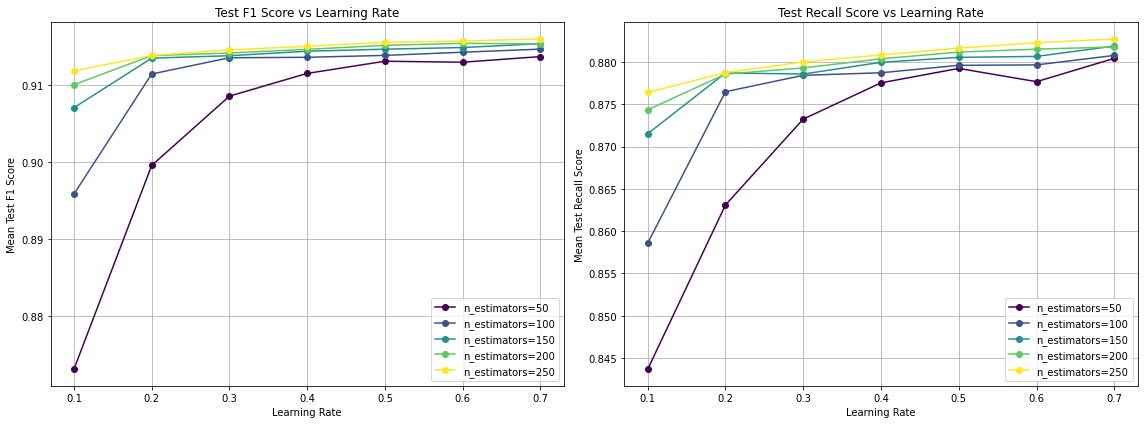

Seen from the plot, n_estimator value 250 and learning rate 0.7 gives the highest recall and F1 score. Thus, we will choose n_estimator value of 250 and learning rate 0.7.

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.7, random_state=123)

# Train the classifier
gb_clf.fit(X_trainres, y_trainres)

# predictions on the training set
y_train_pred = gb_clf.predict(X_trainres)

# predictions on the test set
y_test_pred = gb_clf.predict(X_test)

print(f1_score(y_test,y_test_pred))
print(gb_clf.score(X_test,y_test))
print(precision_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

0.4084919472913616
0.9178945229143379
0.3418279833374173
0.5074572571844307


# 8 Conclusion and Future Improvements


We select each of the best models from the above sections and compare their performance.

|Model | f1|	accuracy|	precision|	recall||
|---|---|---|---|---|---|
|LogisticRegression	0.334742|	0.793971|	0.833594	|0.215504|	0.749363|Random Oversampling|
|KNN	|0.284071		|0.792562|	0.174614	|0.761278|SMOTE-NC|
|LogisticRegression|	0.327237|	0.833289	|0.209273|	0.750000|Class weight|
|Random Forest|0.622715|0.926573	|0.634345|	0.613395	|n_estimator=1|
|Gradient Boosting|0.408492|0.917895|0.341828|0.507457|SMOTE-NC,n_estimator=250,learning rate=0.7 |

Among the first three basic linear models, Logistic Regression with Random Oversampling performs the best. Although its recall is slightly lower than that of kNN, it has much larger f1-score.

Both Random Forest and Gradient Boosting balances f1-score and recall and Random Forest outperforms with higher f1-score and recall.

Therefore, we will select Logistic Regression (with Random Oversampling) and Random Forest as our final models. While Logistic Regression has higher recall, its f1-score is much lower than that of Random Forest. This leads to the application of different models under different scenarios. If the goal is to correctly identify heart disease, Logistic Regression would be the choice. If minimizing inaccurate diagnostic is required at the same time, Random Forest is preferred.

Our future improvements include but not limited to more advanced algorithms to explore deep learning and neural networks for more complex pattern recognition in heart disease prediction, hyperparameter optimization to utilize techniques like Bayesian optimization for finding the best model parameters, and data augmentation to employ synthetic data generation to balance classes and enhance the diversity of training data.


# References

Aguilar, F. (2019) Smote-NC in ML categorization models FO imbalanced datasets, Medium. Available at: https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25.

Galli, S. (2023) Exploring oversampling techniques for imbalanced datasets, Exploring Oversampling Techniques for Imbalanced Datasets. Available at: https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/.

Pytlak, K. (2023) Indicators of heart disease (2022 update), Kaggle. Available at: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data.